# Figures

In this notebook we create the figures which illustrate our results

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import pauli_basis
import umap
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm 
from qiskit.opflow import StateFn
from qiskit.opflow import Z,X,Y
from qiskit.quantum_info import Pauli
from qiskit.opflow import *
from qiskit.circuit.library import Diagonal
from qiskit.extensions import  UnitaryGate
from qiskit import QuantumCircuit
from qiskit import BasicAer
from qiskit.compiler import transpile
from qiskit.quantum_info import Statevector
from scipy.stats import unitary_group

from os import listdir
from os.path import isfile, join
from sklearn.linear_model import Ridge
import random 
import pandas as pd

warnings.filterwarnings('ignore')

## 1. Paper setting

<div>
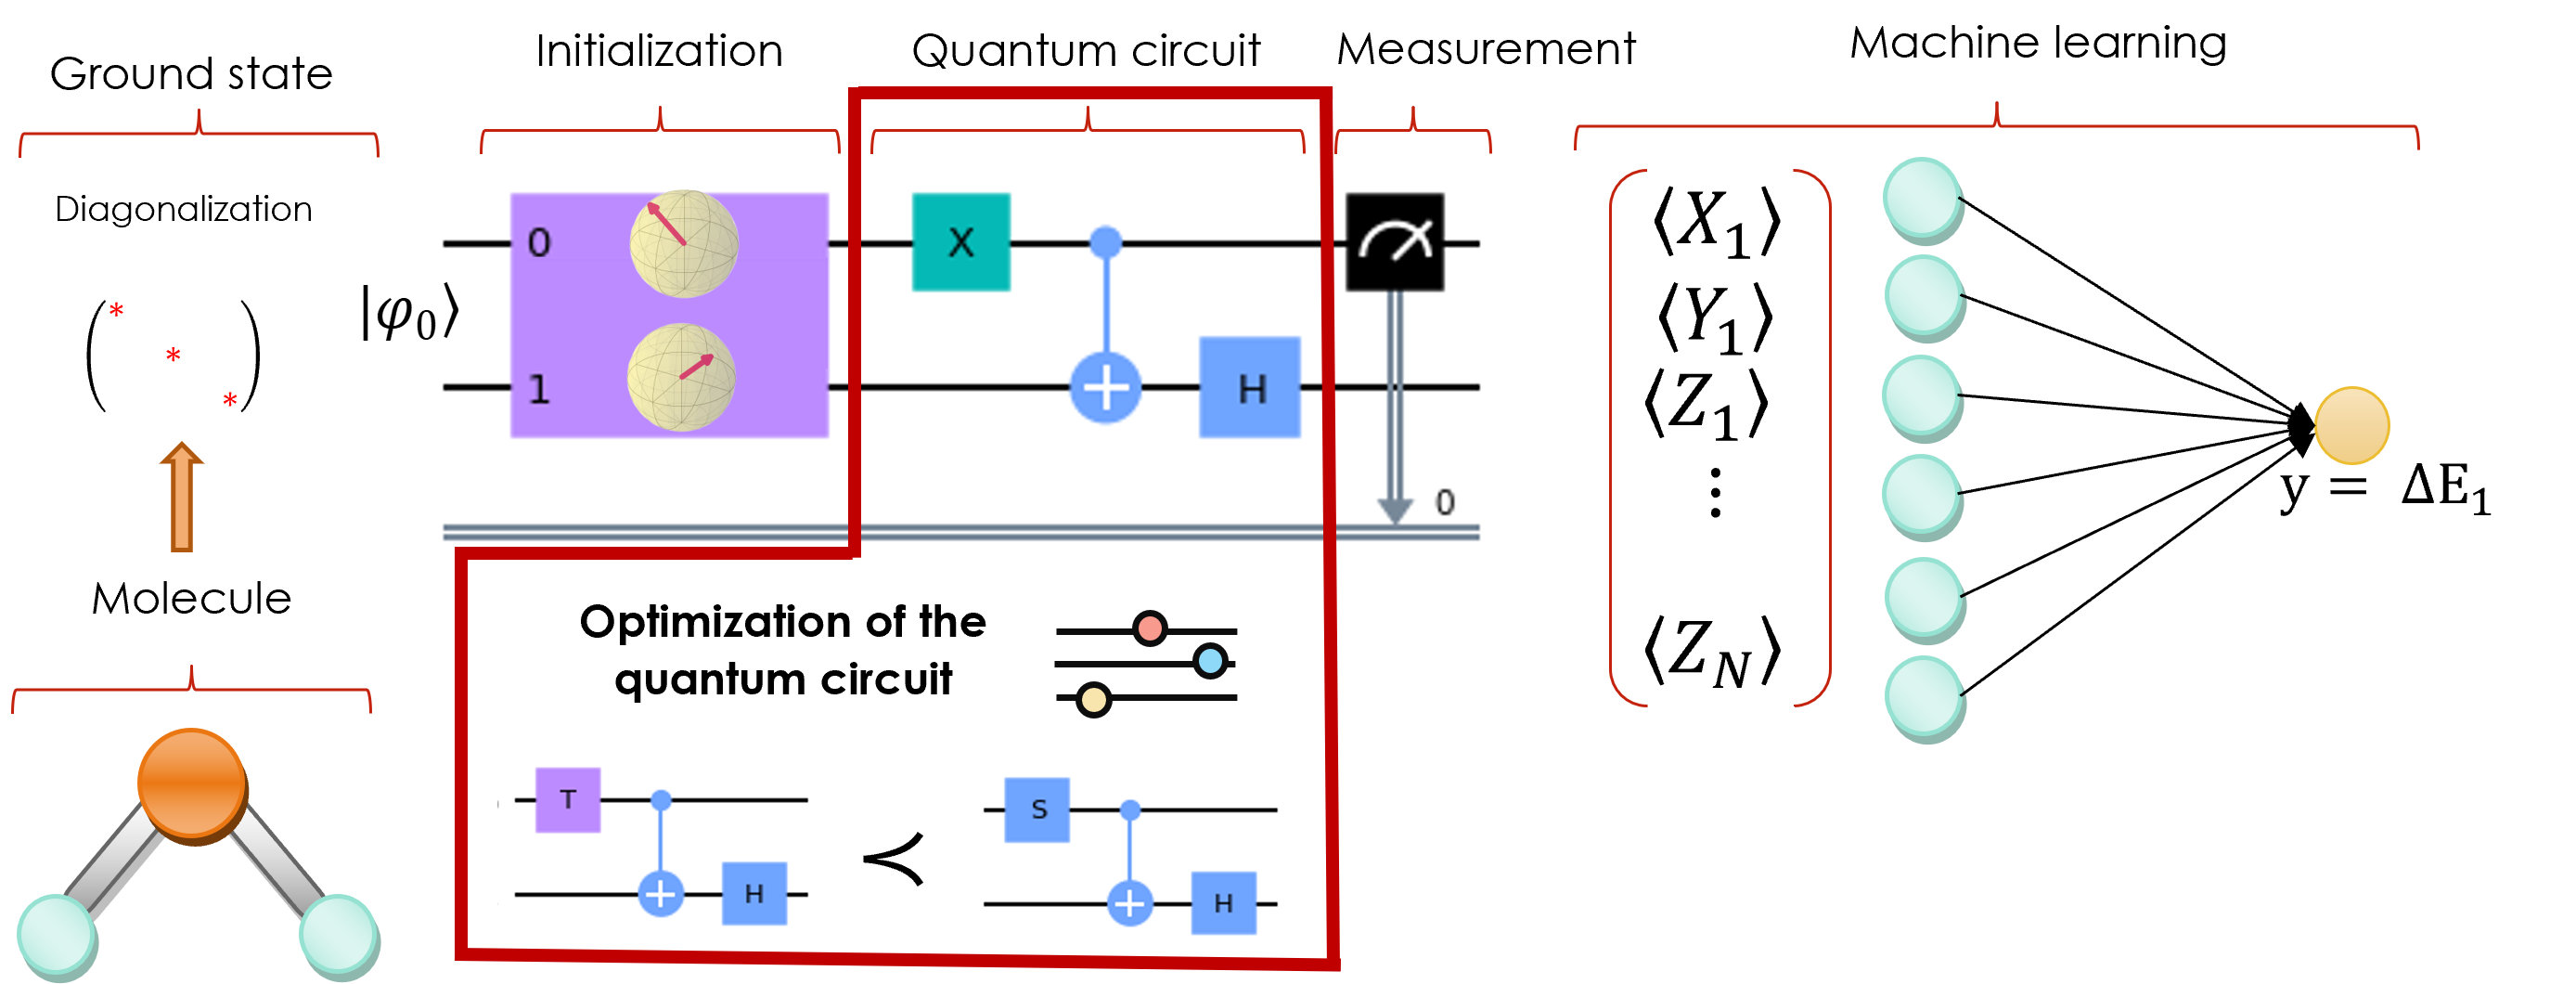
</div>



## 2. Performance results

In this figure we show the performance of the different families of circuits as a function of the number of used gates.

In [83]:
with open('training_data/spectrums_LiH.npy', 'rb') as f:
            spectrums = np.load(f)
with open('training_data/bond_lengths_LiH.npy', 'rb') as f:
            bond_lengths = np.load(f)
with open('training_data/ground_states_LiH.npy', 'rb') as f:
            ground_states = np.load(f)
        
num_states = ground_states.shape[0]
y = np.zeros((num_states, 2))
y[:,0] = spectrums[:,1] - spectrums[:,0]
y[:,1] = spectrums[:,2] - spectrums[:,0]


In [84]:
path_G1_20 = 'results/LiH/G1/20/'
path_G1_50 = 'results/LiH/G1/50/'
path_G1_100 = 'results/LiH/G1/100/'
path_G1_150 = 'results/LiH/G1/150/'
path_G1_200 = 'results/LiH/G1/200/'

path_G2_20 = 'results/LiH/G2/20/'
path_G2_50 = 'results/LiH/G2/50/'
path_G2_100 = 'results/LiH/G2/100/'
path_G2_150 = 'results/LiH/G2/150/'
path_G2_200 = 'results/LiH/G2/200/'

path_G3_20 = 'results/LiH/G3/20/'
path_G3_50 = 'results/LiH/G3/50/'
path_G3_100 = 'results/LiH/G3/100/'
path_G3_150 = 'results/LiH/G3/150/'
path_G3_200 = 'results/LiH/G3/200/'

path_D2= 'results/LiH/D2_H/'
path_D3 = 'results/LiH/D3_H/'
path_Dn = 'results/LiH/Dn_H/'

path_MG_5 = 'results/LiH/MG/5/'
path_MG_10 = 'results/LiH/MG/10/'
path_MG_15 = 'results/LiH/MG/15/'
path_MG_20 = 'results/LiH/MG/20/'
path_MG_50 = 'results/LiH/MG/50/'
path_MG_100 = 'results/LiH/MG/100/'
path_MG_150 = 'results/LiH/MG/150/'
path_MG_200 = 'results/LiH/MG/200/'

path_Ising = 'results/LiH/Ising/'

files_G1_20 = [f for f in listdir(path_G1_20) if isfile(join(path_G1_20, f))]
files_G1_50 = [f for f in listdir(path_G1_50) if isfile(join(path_G1_50, f))]
files_G1_100 = [f for f in listdir(path_G1_100) if isfile(join(path_G1_100, f))]
files_G1_150 = [f for f in listdir(path_G1_150) if isfile(join(path_G1_150, f))]
files_G1_200 = [f for f in listdir(path_G1_200) if isfile(join(path_G1_200, f))]

files_G2_20 = [f for f in listdir(path_G2_20) if isfile(join(path_G2_20, f))]
files_G2_50 = [f for f in listdir(path_G2_50) if isfile(join(path_G2_50, f))]
files_G2_100 = [f for f in listdir(path_G2_100) if isfile(join(path_G2_100, f))]
files_G2_150 = [f for f in listdir(path_G2_150) if isfile(join(path_G2_150, f))]
files_G2_200 = [f for f in listdir(path_G2_200) if isfile(join(path_G2_200, f))]

files_G3_20 = [f for f in listdir(path_G3_20) if isfile(join(path_G3_20, f))]
files_G3_50 = [f for f in listdir(path_G3_50) if isfile(join(path_G3_50, f))]
files_G3_100 = [f for f in listdir(path_G3_100) if isfile(join(path_G3_100, f))]
files_G3_150 = [f for f in listdir(path_G3_150) if isfile(join(path_G3_150, f))]
files_G3_200 = [f for f in listdir(path_G3_200) if isfile(join(path_G3_200, f))]

files_D2 = [f for f in listdir(path_D2) if isfile(join(path_D2, f))]
files_D3 = [f for f in listdir(path_D3) if isfile(join(path_D3, f))]
files_Dn = [f for f in listdir(path_Dn) if isfile(join(path_Dn, f))]

files_MG_5 = [f for f in listdir(path_MG_5) if isfile(join(path_MG_5, f))]
files_MG_10 = [f for f in listdir(path_MG_10) if isfile(join(path_MG_10, f))]
files_MG_15 = [f for f in listdir(path_MG_15) if isfile(join(path_MG_15, f))]
files_MG_20 = [f for f in listdir(path_MG_20) if isfile(join(path_MG_20, f))]
files_MG_50 = [f for f in listdir(path_MG_50) if isfile(join(path_MG_50, f))]
files_MG_100 = [f for f in listdir(path_MG_100) if isfile(join(path_MG_100, f))]
files_MG_150 = [f for f in listdir(path_MG_150) if isfile(join(path_MG_150, f))]
files_MG_200 = [f for f in listdir(path_MG_200) if isfile(join(path_MG_200, f))]

files_Ising = [f for f in listdir(path_Ising) if isfile(join(path_Ising, f))]

files = [files_G1_20,files_G1_50,files_G1_100,files_G1_150,files_G1_200,files_G2_20,
         files_G2_50,files_G2_100, files_G2_150,files_G2_200, files_G3_20,files_G3_50,
         files_G3_100, files_G3_150,files_G3_200,files_D2, files_D3, files_Dn,
         files_MG_5,files_MG_10,files_MG_15,files_MG_20,files_MG_50,files_MG_100,files_MG_150,files_MG_200, files_Ising]
path = [path_G1_20,path_G1_50,path_G1_100,path_G1_150, path_G1_200, path_G2_20,
        path_G2_50,path_G2_100, path_G2_150, path_G2_200, path_G3_20,path_G3_50,
        path_G3_100, path_G3_150, path_G3_200,path_D2, path_D3,path_Dn,
        path_MG_5,path_MG_10,path_MG_15,path_MG_20,path_MG_50,path_MG_100,path_MG_150, path_MG_200, path_Ising]

In [85]:
alphas = [1e-4, 1e-4, 1e-4, 1e-4, 1e-4, 
          1e-4, 1e-4, 1e-4, 1e-4, 1e-4,
          1e-9, 1e-9, 1e-9, 1e-9, 1e-9,
          1e-9, 1e-9, 5e-9,
          1e-4, 1e-4, 1e-4,1e-9, 1e-9, 1e-9, 1e-9, 1e-9,
          5e-8]
alphas2 = [1e-4, 1e-4, 1e-4, 1e-4, 1e-4, 
          1e-4, 1e-4, 1e-4, 1e-4, 1e-4,
          1e-9, 1e-9, 1e-9, 1e-9, 1e-9,
          1e-9, 1e-6, 1e-5,
          1e-4, 1e-4, 1e-4,1e-9, 1e-9, 1e-9, 1e-9, 1e-9,
          1e-6]
mses1 = []
mses2 = []
for i in tqdm(range(len(files))):
    file_list = files[i]
    mse_list1 = []  
    mse_list2 = [] 
    #max_len = min([len(file_list) for file_list in files])
    #file_list = np.array(file_list)[:max_len]
    for file in file_list:
        try:
            # Load results
            with open(path[i] + file, 'rb') as f:
                obs_res = np.load(f) 
            non_zero_obs = [~np.isclose(obs_res[:,j],0).all() for j in range(obs_res.shape[1])]
            if sum(non_zero_obs)>0:
                obs_res = obs_res[:,non_zero_obs]
            # Separate train and test uniformly
            size = obs_res.shape[0]
            idx1 = int(0.2*size)
            idx2 = int(0.5*size)
            train_idx=list(range(idx1)) + list(range(idx2, size))
            X_train, y_train, bond_lengths_train = obs_res[train_idx], y[train_idx], bond_lengths[train_idx]
            X_test, y_test, bond_lengths_test = obs_res[idx1:idx2], y[idx1:idx2], bond_lengths[idx1:idx2]

            # Scale target
            scaler = MinMaxScaler()
            y_train_scaled = scaler.fit_transform(y_train)
            y_test_scaled = scaler.transform(y_test)
            # Fit linear model

            lm1 = Ridge(alpha=alphas[i])
            lm1.fit(X_train, y_train_scaled[:,0])
            lm2 = Ridge(alpha=alphas2[i])
            lm2.fit(X_train, y_train_scaled[:,1])
            # Predict
            y_hat1 = lm1.predict(X_test)
            y_hat2 = lm2.predict(X_test)
            y_hat = np.vstack([y_hat1, y_hat2]).T
            y_hat = scaler.inverse_transform(y_hat)
            # MSE
            mse1 = np.mean(np.square(y_hat - y_test)[:,0])
            mse2 = np.mean(np.square(y_hat - y_test)[:,1])
            mse_list1.append(mse1)
            mse_list2.append(mse2)
        except:
            print(path[i] + file)
    mses1.append(mse_list1)
    mses2.append(mse_list2)

mses1 = [np.mean(mse) for mse in mses1]
mses2 = [np.mean(mse) for mse in mses2]

names = ['G1 20', 'G1 50', 'G1 100', 'G1 150', 'G1 200', 'G2 20', 'G2 50', 'G2 100' , 'G2 150',
         'G2 200', 'G3 20', 'G3 50', 'G3 100', 'G3 150', 'G3 200','D2', 'D3', 'Dn',
         'MG 5','MG 10','MG 15','MG 20', 'MG 50', 'MG 100', 'MG 150', 'MG 200', 'Ising']

results = pd.DataFrame([mses1, mses2], columns=names, index=['MSE1', 'MSE2']).T

 70%|███████   | 19/27 [00:17<00:06,  1.15it/s]

results/LiH/MG/10/obs_LiH_MG_10rand64116.npy


100%|██████████| 27/27 [00:24<00:00,  1.12it/s]


In [5]:
path_G3_20 = 'results/LiH/G3/20/'
path_G3_50 = 'results/LiH/G3/50/'
path_G3_100 = 'results/LiH/G3/100/'
path_G3_150 = 'results/LiH/G3/150/'
path_G3_200 = 'results/LiH/G3/200/'
path_G3_250 = 'results/LiH/G3/250/'
path_G3_300 = 'results/LiH/G3/300/'
path_G3_350 = 'results/LiH/G3/350/'
path_G3_400 = 'results/LiH/G3/400/'
path_G3_450 = 'results/LiH/G3/450/'
path_G3_500 = 'results/LiH/G3/500/'
path_G3_600 = 'results/LiH/G3/600/'
path_G3_700 = 'results/LiH/G3/700/'
path_G3_800 = 'results/LiH/G3/800/'
path_G3_900 = 'results/LiH/G3/900/'
path_G3_1000 = 'results/LiH/G3/1000/'

files_G3_20 = [f for f in listdir(path_G3_20) if isfile(join(path_G3_20, f))]
files_G3_50 = [f for f in listdir(path_G3_50) if isfile(join(path_G3_50, f))]
files_G3_100 = [f for f in listdir(path_G3_100) if isfile(join(path_G3_100, f))]
files_G3_150 = [f for f in listdir(path_G3_150) if isfile(join(path_G3_150, f))]
files_G3_200 = [f for f in listdir(path_G3_200) if isfile(join(path_G3_200, f))]
files_G3_250 = [f for f in listdir(path_G3_250) if isfile(join(path_G3_250, f))]
files_G3_300 = [f for f in listdir(path_G3_300) if isfile(join(path_G3_300, f))]
files_G3_350 = [f for f in listdir(path_G3_350) if isfile(join(path_G3_350, f))]
files_G3_400 = [f for f in listdir(path_G3_400) if isfile(join(path_G3_400, f))]
files_G3_450 = [f for f in listdir(path_G3_450) if isfile(join(path_G3_450, f))]
files_G3_500 = [f for f in listdir(path_G3_500) if isfile(join(path_G3_500, f))]
files_G3_600 = [f for f in listdir(path_G3_600) if isfile(join(path_G3_600, f))]
files_G3_700 = [f for f in listdir(path_G3_700) if isfile(join(path_G3_700, f))]
files_G3_800 = [f for f in listdir(path_G3_800) if isfile(join(path_G3_800, f))]
files_G3_900 = [f for f in listdir(path_G3_900) if isfile(join(path_G3_900, f))]
files_G3_1000 = [f for f in listdir(path_G3_1000) if isfile(join(path_G3_1000, f))]

files = [files_G3_20,files_G3_50,files_G3_100, files_G3_150, files_G3_200,files_G3_250,files_G3_300, files_G3_350,
        files_G3_400,files_G3_450,files_G3_500, files_G3_600, files_G3_700,files_G3_800,files_G3_900, files_G3_1000]
path = [path_G3_20,path_G3_50, path_G3_100, path_G3_150, path_G3_200, path_G3_250,path_G3_300, path_G3_350, path_G3_400,
        path_G3_450,path_G3_500,path_G3_600, path_G3_700, path_G3_800, path_G3_900, path_G3_1000]


In [6]:
alphas = [1e-9, 1e-9, 1e-9, 1e-9, 1e-9, 
          1e-9, 1e-9, 1e-9, 1e-9, 1e-9,
          1e-9, 1e-9, 1e-9, 1e-9, 1e-9,1e-9]
mses1 = []
mses2 = []
for i in tqdm(range(len(files))):
    file_list = files[i]
    mse_list2 = []
    mse_list1 = []
    #max_len = min([len(file_list) for file_list in files])
    #file_list = np.array(file_list)[:max_len]
    for file in file_list:
        # Load results
        with open(path[i] + file, 'rb') as f:
            obs_res = np.load(f) 
        non_zero_obs = [~np.isclose(obs_res[:,i],0).all() for i in range(obs_res.shape[1])]
        if sum(non_zero_obs)>0:
            obs_res = obs_res[:,non_zero_obs]
        # Separate train and test uniformly
        size = obs_res.shape[0]
        idx1 = int(0.2*size)
        idx2 = int(0.5*size)
        train_idx=list(range(idx1)) + list(range(idx2, size))
        X_train, y_train, bond_lengths_train = obs_res[train_idx], y[train_idx], bond_lengths[train_idx]
        X_test, y_test, bond_lengths_test = obs_res[idx1:idx2], y[idx1:idx2], bond_lengths[idx1:idx2]
        # Scale target
        scaler = MinMaxScaler()
        y_train_scaled = scaler.fit_transform(y_train)
        y_test_scaled = scaler.transform(y_test)
        # Fit linear model
        
        lm1 = Ridge(alpha=alphas[i])
        lm2 = Ridge(alpha= alphas[i])
        lm1.fit(X_train, y_train_scaled[:,0])
        lm2.fit(X_train, y_train_scaled[:,1])
        # Predict
        y_hat1 = lm1.predict(X_test)
        y_hat2 = lm2.predict(X_test)
        y_hat = np.vstack([y_hat1, y_hat2]).T
        y_hat = scaler.inverse_transform(y_hat)
        # MSE
        mse1 = np.mean(np.square(y_hat - y_test)[:,0])
        mse_list1.append(mse1)
        mse2 = np.mean(np.square(y_hat - y_test)[:,1])
        mse_list2.append(mse2)
    mses1.append(mse_list1)
    mses2.append(mse_list2)

mses1 = [np.mean(mse) for mse in mses1]
mses2 = [np.mean(mse) for mse in mses2]

100%|██████████| 16/16 [00:41<00:00,  2.58s/it]


In [7]:
names = ['G3 20', 'G3 50', 'G3 100', 'G3 150', 'G3 200', 'G3 250', 'G3 300', 'G3 350', 'G3 400', 'G3 450', 
         'G3 500', 'G3 600','G3 700', 'G3 800','G3 900', 'G3 1000']

results_G3 = pd.DataFrame([mses1, mses2], columns=names, index=['MSE1', 'MSE2']).T

In [113]:
with open('training_data/spectrums_H2O.npy', 'rb') as f:
            spectrums = np.load(f)
with open('training_data/bond_lengths_H2O.npy', 'rb') as f:
            bond_lengths = np.load(f)
with open('training_data/ground_states_H2O.npy', 'rb') as f:
            ground_states = np.load(f)
num_states = ground_states.shape[0]
y = np.zeros((num_states, 2))
y[:,0] = spectrums[:,1] - spectrums[:,0]
y[:,1] = spectrums[:,2] - spectrums[:,0]

In [114]:
path_G1_20 = 'results/H2O/G1/20/'
path_G1_50 = 'results/H2O/G1/50/'
path_G1_100 = 'results/H2O/G1/100/'
path_G1_150 = 'results/H2O/G1/150/'
path_G1_200 = 'results/H2O/G1/200/'

path_G2_20 = 'results/H2O/G2/20/'
path_G2_50 = 'results/H2O/G2/50/'
path_G2_100 = 'results/H2O/G2/100/'
path_G2_150 = 'results/H2O/G2/150/'
path_G2_200 = 'results/H2O/G2/200/'

path_G3_20 = 'results/H2O/G3/20/'
path_G3_50 = 'results/H2O/G3/50/'
path_G3_100 = 'results/H2O/G3/100/'
path_G3_150 = 'results/H2O/G3/150/'
path_G3_200 = 'results/H2O/G3/200/'

path_D2= 'results/H2O/D2_H/'
path_D3 = 'results/H2O/D3_H/'
path_Dn = 'results/H2O/Dn_H/'

path_MG_5 = 'results/H2O/MG/5/'
path_MG_10 = 'results/H2O/MG/10/'
path_MG_15 = 'results/H2O/MG/15/'
path_MG_20 = 'results/H2O/MG/20/'
path_MG_50 = 'results/H2O/MG/50/'
path_MG_100 = 'results/H2O/MG/100/'
path_MG_150 = 'results/H2O/MG/150/'
path_MG_200 = 'results/H2O/MG/200/'
path_Ising = 'results/H2O/Ising/'

files_G1_20 = [f for f in listdir(path_G1_20) if isfile(join(path_G1_20, f))]
files_G1_50 = [f for f in listdir(path_G1_50) if isfile(join(path_G1_50, f))]
files_G1_100 = [f for f in listdir(path_G1_100) if isfile(join(path_G1_100, f))]
files_G1_150 = [f for f in listdir(path_G1_150) if isfile(join(path_G1_150, f))]
files_G1_200 = [f for f in listdir(path_G1_200) if isfile(join(path_G1_200, f))]

files_G2_20 = [f for f in listdir(path_G2_20) if isfile(join(path_G2_20, f))]
files_G2_50 = [f for f in listdir(path_G2_50) if isfile(join(path_G2_50, f))]
files_G2_100 = [f for f in listdir(path_G2_100) if isfile(join(path_G2_100, f))]
files_G2_150 = [f for f in listdir(path_G2_150) if isfile(join(path_G2_150, f))]
files_G2_200 = [f for f in listdir(path_G2_200) if isfile(join(path_G2_200, f))]


files_G3_20 = [f for f in listdir(path_G3_20) if isfile(join(path_G3_20, f))]
files_G3_50 = [f for f in listdir(path_G3_50) if isfile(join(path_G3_50, f))]
files_G3_100 = [f for f in listdir(path_G3_100) if isfile(join(path_G3_100, f))]
files_G3_150 = [f for f in listdir(path_G3_150) if isfile(join(path_G3_150, f))]
files_G3_200 = [f for f in listdir(path_G3_200) if isfile(join(path_G3_200, f))]

files_D2 = [f for f in listdir(path_D2) if isfile(join(path_D2, f))]
files_D3 = [f for f in listdir(path_D3) if isfile(join(path_D3, f))]
files_Dn = [f for f in listdir(path_Dn) if isfile(join(path_Dn, f))]

files_MG_5 = [f for f in listdir(path_MG_5) if isfile(join(path_MG_5, f))]
files_MG_10 = [f for f in listdir(path_MG_10) if isfile(join(path_MG_10, f))]
files_MG_15 = [f for f in listdir(path_MG_15) if isfile(join(path_MG_15, f))]
files_MG_20 = [f for f in listdir(path_MG_20) if isfile(join(path_MG_20, f))]
files_MG_50 = [f for f in listdir(path_MG_50) if isfile(join(path_MG_50, f))]
files_MG_100 = [f for f in listdir(path_MG_100) if isfile(join(path_MG_100, f))]
files_MG_150 = [f for f in listdir(path_MG_150) if isfile(join(path_MG_150, f))]
files_MG_200 = [f for f in listdir(path_MG_200) if isfile(join(path_MG_200, f))]

files_Ising = [f for f in listdir(path_Ising) if isfile(join(path_Ising, f))]


files = [files_G1_20,files_G1_50,files_G1_100,files_G1_150,files_G1_200,files_G2_20,
         files_G2_50,files_G2_100, files_G2_150,files_G2_200, files_G3_20,files_G3_50,
         files_G3_100, files_G3_150,files_G3_200,files_D2, files_D3, files_Dn,
         files_MG_5,files_MG_10,files_MG_15,files_MG_20,files_MG_50,files_MG_100,files_MG_150,files_MG_200, files_Ising]
path = [path_G1_20,path_G1_50,path_G1_100,path_G1_150, path_G1_200, path_G2_20,
        path_G2_50,path_G2_100, path_G2_150, path_G2_200, path_G3_20,path_G3_50,
        path_G3_100, path_G3_150, path_G3_200,path_D2, path_D3,path_Dn,
        path_MG_5,path_MG_10,path_MG_15,path_MG_20,path_MG_50,path_MG_100,path_MG_150, path_MG_200, path_Ising]

In [115]:
mses1 = []
mses2 = []

alphas = [1e-9, 1e-9, 1e-9, 1e-9, 1e-9, 
          1e-9, 1e-9, 1e-9, 1e-9, 1e-9,
          1e-9, 1e-9, 1e-9, 1e-9, 1e-9,
          1e-9, 1e-9, 1e-8,
          1e-9, 1e-9, 1e-9,1e-9, 1e-9, 1e-9, 1e-9, 1e-9, 1e-9]

alphas2 = [1e-9, 1e-9, 1e-9, 1e-9, 1e-9, 
          1e-9, 1e-9, 1e-9, 1e-9, 1e-9,
          1e-9, 1e-9, 1e-9, 1e-9, 1e-9,
          1e-9, 1e-9, 3e-9,
          1e-9, 1e-9, 1e-9,1e-9, 1e-9, 1e-9, 1e-9, 1e-9, 1e-9]

for i in range(len(files)):
    file_list = files[i]
    mse_list1 = []
    mse_list2 = []
    #max_len = min([len(file_list) for file_list in files])
    #file_list = np.array(file_list)[:max_len]
    j=0
    for file in tqdm(file_list):
        # Load results
        with open(path[i] + file, 'rb') as f:
            obs_res = np.load(f) 
        non_zero_obs = [~np.isclose(obs_res[:,i],0).all() for i in range(obs_res.shape[1])]
        if sum(non_zero_obs)>0:
            obs_res = obs_res[:,non_zero_obs]
        # Separate train and test uniformly
        size = obs_res.shape[0]
        idx1 = int(0.55*size)
        idx2 = int(0.85*size)
        train_idx=list(range(idx1)) + list(range(idx2, size))
        X_train, y_train, bond_lengths_train = obs_res[train_idx], y[train_idx], bond_lengths[train_idx]
        X_test, y_test, bond_lengths_test = obs_res[idx1:idx2], y[idx1:idx2], bond_lengths[idx1:idx2]
        
        # Scale target
        scaler = MinMaxScaler()
        y_train_scaled = scaler.fit_transform(y_train)
        y_test_scaled = scaler.transform(y_test)
        # Fit and optimize linear model
        lm = Ridge(alpha = alphas[i])
        lm.fit(X_train, y_train_scaled)
        y_hat = lm.predict(X_test)
        y_hat = scaler.inverse_transform(y_hat)
        # MSE
        mse1 = np.mean(np.square(y_hat - y_test)[:,0])
        mse_list1.append(mse1)
        lm = Ridge(alpha = alphas2[i])
        lm.fit(X_train, y_train_scaled)
        y_hat = lm.predict(X_test)
        y_hat = scaler.inverse_transform(y_hat)
        mse2 = np.mean(np.square(y_hat - y_test)[:,1])
        mse_list2.append(mse2)
        j+=1
    mses1.append(mse_list1)
    mses2.append(mse_list2)
    
mses1 = [np.mean(mse) for mse in mses1]
mses2 = [np.mean(mse) for mse in mses2]

100%|██████████| 400/400 [00:01<00:00, 396.87it/s]


In [116]:
names = ['G1 20', 'G1 50', 'G1 100', 'G1 150', 'G1 200', 'G2 20', 'G2 50', 'G2 100' , 'G2 150',
         'G2 200', 'G3 20', 'G3 50', 'G3 100', 'G3 150', 'G3 200','D2', 'D3', 'Dn',
         'MG 5','MG 10','MG 15','MG 20', 'MG 50', 'MG 100', 'MG 150', 'MG 200', 'Ising']

results_H2O = pd.DataFrame([mses1, mses2], columns=names, index=['MSE1', 'MSE2']).T

In [117]:
path_G3_20 = 'results/H2O/G3/20/'
path_G3_50 = 'results/H2O/G3/50/'
path_G3_100 = 'results/H2O/G3/100/'
path_G3_150 = 'results/H2O/G3/150/'
path_G3_200 = 'results/H2O/G3/200/'
path_G3_250 = 'results/H2O/G3/250/'
path_G3_300 = 'results/H2O/G3/300/'
path_G3_350 = 'results/H2O/G3/350/'
path_G3_400 = 'results/H2O/G3/400/'
path_G3_450 = 'results/H2O/G3/450/'
path_G3_500 = 'results/H2O/G3/500/'
path_G3_600 = 'results/H2O/G3/600/'
path_G3_700 = 'results/H2O/G3/700/'
path_G3_800 = 'results/H2O/G3/800/'
path_G3_900 = 'results/H2O/G3/900/'
path_G3_1000 = 'results/H2O/G3/1000/'

files_G3_20 = [f for f in listdir(path_G3_20) if isfile(join(path_G3_20, f))]
files_G3_50 = [f for f in listdir(path_G3_50) if isfile(join(path_G3_50, f))]
files_G3_100 = [f for f in listdir(path_G3_100) if isfile(join(path_G3_100, f))]
files_G3_150 = [f for f in listdir(path_G3_150) if isfile(join(path_G3_150, f))]
files_G3_200 = [f for f in listdir(path_G3_200) if isfile(join(path_G3_200, f))]
files_G3_250 = [f for f in listdir(path_G3_250) if isfile(join(path_G3_250, f))]
files_G3_300 = [f for f in listdir(path_G3_300) if isfile(join(path_G3_300, f))]
files_G3_350 = [f for f in listdir(path_G3_350) if isfile(join(path_G3_350, f))]
files_G3_400 = [f for f in listdir(path_G3_400) if isfile(join(path_G3_400, f))]
files_G3_450 = [f for f in listdir(path_G3_450) if isfile(join(path_G3_450, f))]
files_G3_500 = [f for f in listdir(path_G3_500) if isfile(join(path_G3_500, f))]
files_G3_600 = [f for f in listdir(path_G3_600) if isfile(join(path_G3_600, f))]
files_G3_700 = [f for f in listdir(path_G3_700) if isfile(join(path_G3_700, f))]
files_G3_800 = [f for f in listdir(path_G3_800) if isfile(join(path_G3_800, f))]
files_G3_900 = [f for f in listdir(path_G3_900) if isfile(join(path_G3_900, f))]
files_G3_1000 = [f for f in listdir(path_G3_1000) if isfile(join(path_G3_1000, f))]

files = [files_G3_20,files_G3_50,files_G3_100, files_G3_150, files_G3_200,files_G3_250,files_G3_300, files_G3_350,
        files_G3_400,files_G3_450,files_G3_500, files_G3_600, files_G3_700,files_G3_800,files_G3_900, files_G3_1000]
path = [path_G3_20,path_G3_50, path_G3_100, path_G3_150, path_G3_200, path_G3_250,path_G3_300, path_G3_350, path_G3_400,
        path_G3_450,path_G3_500,path_G3_600, path_G3_700, path_G3_800, path_G3_900, path_G3_1000]

In [118]:
alphas = [1e-9, 1e-9, 1e-9, 1e-9, 1e-9, 
          1e-9, 1e-9, 1e-9, 1e-9, 1e-9,
          1e-9, 1e-9, 1e-9, 1e-9, 1e-9,1e-9]
mses1 = []
mses2 = []
for i in tqdm(range(len(files))):
    file_list = files[i]
    mse_list1 = []
    mse_list2 = []
    #max_len = min([len(file_list) for file_list in files])
    #file_list = np.array(file_list)[:max_len]
    for file in file_list:
        # Load results
        with open(path[i] + file, 'rb') as f:
            obs_res = np.load(f) 
        non_zero_obs = [~np.isclose(obs_res[:,i],0).all() for i in range(obs_res.shape[1])]
        if sum(non_zero_obs)>0:
            obs_res = obs_res[:,non_zero_obs]
        # Separate train and test uniformly
        size = obs_res.shape[0]
        idx1 = int(0.55*size)
        idx2 = int(0.85*size)
        train_idx=list(range(idx1)) + list(range(idx2, size))
        X_train, y_train, bond_lengths_train = obs_res[train_idx], y[train_idx], bond_lengths[train_idx]
        X_test, y_test, bond_lengths_test = obs_res[idx1:idx2], y[idx1:idx2], bond_lengths[idx1:idx2]
        # Scale target
        scaler = MinMaxScaler()
        y_train_scaled = scaler.fit_transform(y_train)
        y_test_scaled = scaler.transform(y_test)
        # Fit linear model
        
        lm1 = Ridge(alpha=alphas[i])
        lm2 = Ridge(alpha= alphas[i])
        lm1.fit(X_train, y_train_scaled[:,0])
        lm2.fit(X_train, y_train_scaled[:,1])
        # Predict
        y_hat1 = lm1.predict(X_test)
        y_hat2 = lm2.predict(X_test)
        y_hat = np.vstack([y_hat1, y_hat2]).T
        y_hat = scaler.inverse_transform(y_hat)
        # MSE
        mse1 = np.mean(np.square(y_hat - y_test)[:,0])
        mse_list1.append(mse1)
        mse2 = np.mean(np.square(y_hat - y_test)[:,1])
        mse_list2.append(mse2)

    mses1.append(mse_list1)
    mses2.append(mse_list2)

mses1 = [np.mean(mse) for mse in mses1]
mses2 = [np.mean(mse) for mse in mses2]

100%|██████████| 16/16 [00:15<00:00,  1.06it/s]


In [119]:
names = ['G3 20', 'G3 50', 'G3 100', 'G3 150', 'G3 200', 'G3 250', 'G3 300', 'G3 350', 'G3 400', 'G3 450', 
         'G3 500', 'G3 600','G3 700', 'G3 800','G3 900', 'G3 1000']

results_G3_H2O = pd.DataFrame([mses1, mses2], columns=names, index=['MSE1', 'MSE2']).T

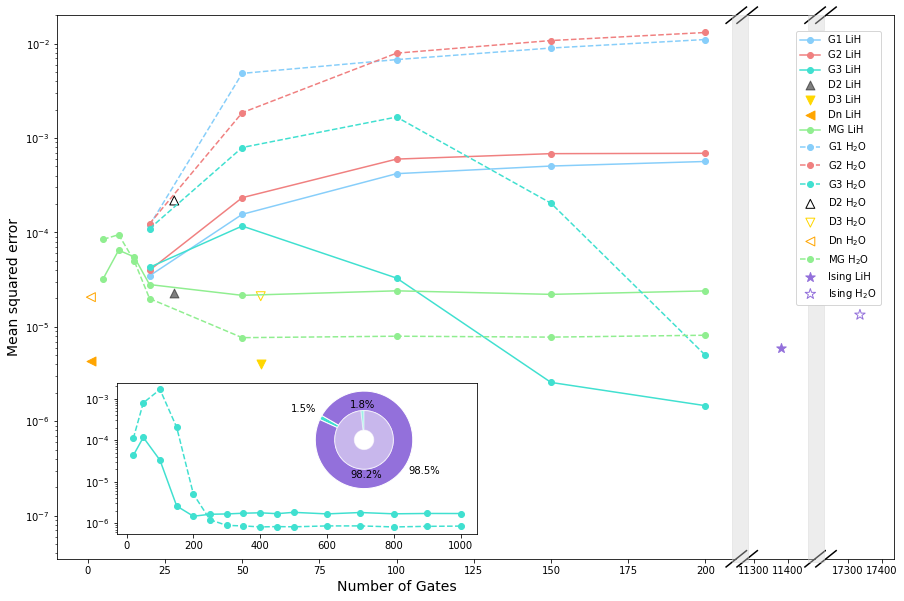

In [106]:
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid.inset_locator import inset_axes

names_type = [u'G1', u'G2' ,u'G3', u'MG']
x = [20,50,100,150,200]
xMG = [5,10,15,20,50,100,150,200]
colors = ['lightskyblue', 'lightcoral', 'turquoise', 'black', 'gold', 'orange', 'lightgreen', 'mediumpurple']

#LIH
mses_G1 = results['MSE1'][['G1 '+ str(n) for n in x]]
mses_G2 = results['MSE1'][['G2 '+ str(n) for n in x]]
mses_G3 = results['MSE1'][['G3 '+ str(n) for n in x]]
mses_MG = results['MSE1'][['MG '+ str(n) for n in xMG]]
mses_D2 = results['MSE1']['D2']
mses_D3 = results['MSE1']['D3']
mses_Dn = results['MSE1']['Dn']
mses_Ising = results['MSE1']['Ising']

#H2O
mses_G1_H2O = results_H2O['MSE1'][['G1 '+ str(n) for n in x]]
mses_G2_H2O = results_H2O['MSE1'][['G2 '+ str(n) for n in x]]
mses_G3_H2O = results_H2O['MSE1'][['G3 '+ str(n) for n in x]]
mses_MG_H2O = results_H2O['MSE1'][['MG '+ str(n) for n in xMG]]
mses_D2_H2O = results_H2O['MSE1']['D2']
mses_D3_H2O = results_H2O['MSE1']['D3']
mses_Dn_H2O = results_H2O['MSE1']['Dn']
mses_Ising_H2O = results_H2O['MSE1']['Ising']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize = (15,10), gridspec_kw={'width_ratios': [100, 10, 10]}, sharey=True)

ax1.plot(x, mses_G1, marker='o', color = colors[0], label ='G1 LiH')
ax1.plot(x, mses_G2, marker='o', color = colors[1], label ='G2 LiH')
ax1.plot(x, mses_G3, marker='o', color = colors[2], label ='G3 LiH')
ax1.scatter(28, mses_D2, marker='^', s=80,alpha=0.5, color = colors[3], label ='D2 LiH')
ax1.scatter(56, mses_D3, marker='v', s=80, color = colors[4], label ='D3 LiH')
ax1.scatter(1, mses_Dn, marker='<', s=80, color = colors[5], label ='Dn LiH')
ax1.plot(xMG, mses_MG, marker='o', color = colors[6], label ='MG LiH')

ax1.plot(x, mses_G1_H2O, linestyle='--', marker='o', color = colors[0], label ='G1 $\mathrm{H_2O}$')
ax1.plot(x, mses_G2_H2O, linestyle='--', marker='o', color = colors[1], label ='G2 $\mathrm{H_2O}$')
ax1.plot(x, mses_G3_H2O, linestyle='--', marker='o', color = colors[2], label ='G3 $\mathrm{H_2O}$')
ax1.scatter(28, mses_D2_H2O, facecolors='none', s=80, marker='^',  color = colors[3], label ='D2 $\mathrm{H_2O}$')
ax1.scatter(56, mses_D3_H2O, facecolors='none', s=80, marker='v', color = colors[4], label ='D3 $\mathrm{H_2O}$')
ax1.scatter(1, mses_Dn_H2O, facecolors='none', s=80, marker='<', color = colors[5], label ='Dn $\mathrm{H_2O}$')
ax1.plot(xMG, mses_MG_H2O, linestyle='--', marker='o', color = colors[6], label ='MG $\mathrm{H_2O}$')

# Ising
ax1.scatter(11381, mses_Ising, marker='*', s=100, color = colors[7], label ='Ising LiH')
ax2.scatter(11381, mses_Ising, marker='*', s=100, color = colors[7], label ='Ising LiH')
ax1.scatter(17335, mses_Ising_H2O,facecolors='none', marker='*', s=120, color = colors[7], label ='Ising $\mathrm{H_2O}$')
ax3.scatter(17335, mses_Ising_H2O,facecolors='none', marker='*', s=120, color = colors[7], label ='Ising $\mathrm{H_2O}$')



# Insert
axins = inset_axes(ax1,
                   width=5,  # width = 30% of parent_bbox
                   height=2.1,  # height : 1 inch
                   loc=3,
                   bbox_to_anchor=(190,110))
# LiH
x2 = [20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000]
mses_G3_long = results_G3['MSE1'][['G3 '+ str(n) for n in x2]]
axins.plot(x2, mses_G3_long, marker='o', color = colors[2] )

# H2O
mses_G3_long_H2O = results_G3_H2O['MSE1'][['G3 '+ str(n) for n in x2]]
axins.plot(x2, mses_G3_long_H2O, linestyle='--', marker='o', color = colors[2] )
axins.set_yscale('log')

# Insert inside Insert 
axins2 = inset_axes(axins,
                   width=2.7,  # width = 30% of parent_bbox
                   height=1.5,  # height : 1 inch
                   loc=3,
                   bbox_to_anchor=(340,150))
axins2.set_frame_on(False)
sizes = [1.5, 98.5]
explode = [0.0,0]
size = 0.2
rad = 0.5
axins2.pie(sizes, explode=explode, radius = rad, startangle=150, colors =[colors[2], colors[7]],
          autopct='%1.1f%%',pctdistance=1.4, wedgeprops=dict(width=size, edgecolor='w'))


sizes = [1.8, 98.2]
pie2 = axins2.pie(sizes, explode=explode, radius = rad - size, startangle=90, colors =[colors[2], colors[7]],
           autopct='%1.1f%%',pctdistance=1.2, wedgeprops=dict(width=size, edgecolor='w'))
pie2[0][0].set_alpha(0.5)
pie2[0][1].set_alpha(0.5)
axins2.axis("equal") 

ax1.set_yscale('log')
ax1.set_ylim(3.5e-8, 2e-2)
ax1.set_xlabel('Number of Gates',fontsize=14)
ax1.set_ylabel('Mean squared error',fontsize=14)
ax1.set_xlim(-10,210)
ax2.set_xlim(11281,11481)
ax3.set_xlim(17235,17435)


ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax2.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False)
ax3.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False)
d = .015
dist = 0.4
ax1.plot((1 - d, 1 + d), (-d, +d), **dict(transform=ax1.transAxes, color='k', clip_on=False))
ax2.plot((- 10*d, +10*d), (-d, +d), **dict(transform=ax2.transAxes, color='k', clip_on=False))

ax1.plot((1-d, 1+d), (1-d, 1+d), **dict(transform=ax1.transAxes, color='k', clip_on=False))
ax2.plot((-10*d, 10*d), (1-d, 1+d), **dict(transform=ax2.transAxes, color='k', clip_on=False))

ax2.plot((1 - 10*d, 1 + 10*d), (-d, +d), **dict(transform=ax2.transAxes, color='k', clip_on=False))
ax3.plot((- 10*d, +10*d), (-d, +d), **dict(transform=ax3.transAxes, color='k', clip_on=False))

ax2.plot((1-10*d, 1+10*d), (1-d, 1+d), **dict(transform=ax2.transAxes, color='k', clip_on=False))
ax3.plot((-10*d, 10*d), (1-d, 1+d), **dict(transform=ax3.transAxes, color='k', clip_on=False))
 
ax1.legend(bbox_to_anchor=(1.22, 0.98))
ax2.set_zorder(-1)
ax3.set_zorder(-1)
axins.set_zorder(1)
axins2.set_zorder(1)
#fig.set_facecolor('lightgray')
plt.subplots_adjust(wspace=0.04, hspace=0)


tri1 = Rectangle((0.75, 0.12), 0.015, 0.76, color='lightgray', alpha=0.4, 
                transform=fig.transFigure, figure=fig)
tri2 = Rectangle((0.82, 0.12), 0.015, 0.358, color='lightgray', alpha=0.4,
                transform=fig.transFigure, figure=fig)
tri3 = Rectangle((0.82, 0.86), 0.015, 0.02, color='lightgray', alpha=0.4,
                transform=fig.transFigure, figure=fig)
fig.patches.extend([tri1, tri2, tri3])

plt.savefig('figures/mses.png', format='png')
plt.show()

## 3. Pauli space filling

In this figure we show how the G1, G2 and G3 families fill the Pauli space, as a function of the number of gates. We compare it with randomly filling the space. For simplicity and better visualization, we use a toy model of just 2 qubits.

In [44]:
class QuantumCircQiskit:
    def __init__(self, gates_name, num_gates=50,nqbits=8,observables_type = 'single'):
        
        self.num_gates = num_gates
        self.gates_name = gates_name
        self.observables_type = observables_type
        self.gates_set = []
        self.qubits_set = []
        self.nqbits=nqbits
        if self.gates_name=='G1':
            gates = ['CNOT', 'H', 'X']
        if self.gates_name=='G2':
            gates = ['CNOT', 'H', 'S']
        if self.gates_name=='G3':
            gates = ['CNOT', 'H', 'T']  
        
        qubit_idx = list(range(self.nqbits))
        # Store gates
        if self.gates_name in ['G1', 'G2', 'G3']:
            for i in range(self.num_gates):
                # Select random gate
                gate = random.sample(gates,1)[0] 
                self.gates_set.append(gate)
                if gate=='CNOT':
                    # Select qubit 1 and 2 (different qubits)
                    qbit1 = random.sample(qubit_idx,1)[0]
                    qubit_idx2 = qubit_idx.copy()
                    qubit_idx2.remove(qbit1)
                    qbit2 = random.sample(qubit_idx2,1)[0]
                    self.qubits_set.append([qbit1, qbit2])
                else:
                    # Select qubit
                    qbit = random.sample(qubit_idx,1)[0]
                    self.qubits_set.append([qbit])
        elif self.gates_name=='D2':
            qubit_idx = list(range(self.nqbits))
            self.qubits_set = list(itertools.combinations(qubit_idx, 2))
            self.phis = np.random.uniform(0, 2*np.pi, size=(len(self.qubits_set), 2**2))
        elif self.gates_name=='D3':
            qubit_idx = list(range(self.nqbits))
            self.qubits_set = list(itertools.combinations(qubit_idx, 3))
            self.phis = np.random.uniform(0, 2*np.pi, size=(len(self.qubits_set), 2**3))
        elif self.gates_name=='Dn':
            self.phis = np.random.uniform(0, 2*np.pi, size=(2**self.nqbits))
        elif self.gates_name=='MG':
            for i in range(self.num_gates):
                G = self.matchgate()
                self.gates_set.append(G)
                qbit1 = random.sample(qubit_idx,1)[0]
                qubit_idx2 = qubit_idx.copy()
                qubit_idx2.remove(qbit1)
                qbit2 = random.sample(qubit_idx2,1)[0]
                self.qubits_set.append([qbit1, qbit2])

                
    def initialization(self, initial_state):
        # 1. INITIALIZATION
        # Define initial state
        initial_state = initial_state.round(6)
        initial_state/=np.sqrt(np.sum(initial_state**2))

        # Define qiskit circuit to initialize quantum state
        self.nqbits = int(np.log2(initial_state.shape[0]))
        qc = QuantumCircuit(nqbits)
        qc.initialize(initial_state, list(range(nqbits)))
        return qc

    def apply_G_gates(self, qc):
        # Apply random gates to random qubits
        for i in range(self.num_gates):
            # Select random gate
            # Select random gate
            gate = self.gates_set[i]
            if gate=='CNOT': # For 2-qubit gates
                # Select qubit 1 and 2 (different qubits)
                qbit1, qbit2 = self.qubits_set[i]
                # Apply gate to qubits
                qc.cx(qbit1, qbit2) 
            else: # For 1-qubit gates
                # Select qubit
                qbit = self.qubits_set[i][0]
                if gate=='X':# Apply gate
                    qc.x(qbit) 
                if gate=='S':
                    qc.s(qbit) 
                if gate=='H':
                    qc.h(qbit) 
                if gate=='T':
                    qc.t(qbit) 
    
    def apply_matchgates(self, qc):
        for i in range(self.num_gates):
            gate = self.gates_set[i]
            qbit1, qbit2 = self.qubits_set[i]
            qc.unitary(gate, [qbit1, qbit2], label='MG')
            
    def matchgate(self):
        A = unitary_group.rvs(2)
        B = unitary_group.rvs(2)
        detA = np.linalg.det(A)
        detB = np.linalg.det(B)
        B = B/np.sqrt(detB)*np.sqrt(detA)
        G = np.array([[A[0,0],0,0,A[0,1]],[0,B[0,0], B[0,1],0],
                      [0,B[1,0],B[1,1],0],[A[1,0],0,0,A[1,1]]])
        return G
    
    def apply_Dn(self, qc):
        # Apply Dn gate
        diagonals = np.exp(1j*self.phis)
        qc += Diagonal(diagonals)
        
    def apply_D2(self, qc):
        i=0
        for pair in self.qubits_set:
            # Apply D2 gate
            diagonals = np.diag(np.exp(1j*self.phis[i]))
            D2 = UnitaryGate(diagonals)
            qc.append(D2, [pair[0], pair[1]])
            i+=1
            
    def apply_D3(self, qc):
        i=0
        for pair in self.qubits_set:
            # Apply D3 gate
            diagonals = np.diag(np.exp(1j*self.phis[i]))
            D3 = UnitaryGate(diagonals)
            qc.append(D3, [pair[0], pair[1], pair[2]])
            i+=1


    def get_observables(self):
        observables = []
        name_gate=''
        for i in range(self.nqbits):
            name_gate+= 'I' 
        for i in range(self.nqbits):
            # X
            op_nameX = name_gate[:i] + 'X' + name_gate[(i+1):]
            obs = PauliOp(Pauli(op_nameX))
            observables.append(obs)
            # Y
            op_nameY = name_gate[:i] + 'Y' + name_gate[(i+1):]
            obs = PauliOp(Pauli(op_nameY))
            observables.append(obs)
            # Z
            op_nameZ = name_gate[:i] + 'Z' + name_gate[(i+1):]
            obs = PauliOp(Pauli(op_nameZ))
            observables.append(obs)
        return observables

    def run_circuit(self, initial_state):

        # 1. INITIALIZATION
        qc = self.initialization(initial_state)
        
        # 2. DEFINE RANDOM CIRCUIT
        if self.gates_name in ['G1', 'G2', 'G3']:
            self.apply_G_gates(qc)
        elif self.gates_name=='D2':
            self.apply_D2(qc)
        elif self.gates_name=='D3':
            self.apply_D3(qc)
        elif self.gates_name=='Dn':
            self.apply_Dn(qc)
        elif self.gates_name=='MG':
            self.apply_matchgates(qc)
        else:
            print('Unknown gate')

        # Obtain circuit
        #circuit = qc.to_circ()

        # 3. DEFINE OBSERVABLES
        # Define observables to measure
        if self.observables_type=='single':
            observables = self.get_observables()

        # 4. RUN CIRCUIT
        results = []
        
        backend = BasicAer.get_backend('statevector_simulator')
        job = backend.run(transpile(qc, backend))
        qc_state = job.result().get_statevector(qc)

        for obs in observables:
            obs_mat = obs.to_spmatrix()
            expect = np.inner(np.conjugate(qc_state), obs_mat.dot(qc_state)).real
            results.append(expect)

        return np.array(results)
    
    
def pauli_group_span(name_gate, nqbits=3, num_samples=400, num_gates=20):
    coefs_pauli_group = []
    for j in tqdm(range(num_samples)):
        # Define quantum circuit
        qc_tot = QuantumCircQiskit(name_gate, num_gates=num_gates,nqbits=nqbits,observables_type = 'single')
        qc = QuantumCircuit(nqbits)
        if name_gate in ['G1', 'G2', 'G3']:
            qc_tot.apply_G_gates(qc)
        elif name_gate=='D2':
            qc_tot.apply_D2(qc)
        elif name_gate=='D3':
            qc_tot.apply_D3(qc)
        elif name_gate=='Dn':
            qc_tot.apply_Dn(qc)
        elif name_gate=='MG':
            qc_tot.apply_matchgates(qc)
            
        # Get unitary
        backend = BasicAer.get_backend('unitary_simulator')
        job = backend.run(transpile(qc, backend))
        U = job.result().get_unitary(qc)
        
        # Get pauli matrices
        pauli_group = pauli_basis(nqbits)
        pauli_group_matrices = np.asarray(pauli_group.to_matrix())
        # Get coefficients in pauli_group
        size_mat = pauli_group_matrices.shape[1]
        coefs, _,_,_ = np.linalg.lstsq((pauli_group_matrices.reshape(-1,size_mat*size_mat)).T, U.reshape(size_mat*size_mat))
        U_hat = np.dot(coefs,pauli_group_matrices.reshape(-1,size_mat*size_mat)).reshape(size_mat,size_mat)
        if not np.isclose(U,U_hat).all():
            print('Unitaries are not the same')
        coefs_pauli_group.append(coefs)

    return np.asarray(coefs_pauli_group)

In [130]:
scaler = MinMaxScaler()
coefs_pauli_G1_list = []
coefs_pauli_G2_list = []
coefs_pauli_G3_list = []
coefs_pauli_MG_list = []
num_gates_list = [5,10,20]
num_samples = 4000
embedding_G1_list = []
embedding_G2_list = []
embedding_G3_list = []
embedding_MG_list = []
umap_mod1 = umap.UMAP(random_state=1234)
umap_mod2 = umap.UMAP(random_state=1234)
umap_mod3 = umap.UMAP(random_state=1234)
umap_mod = umap.UMAP(random_state=1234)
umap_modDn = umap.UMAP(random_state=1234)

# G1, G2, G3
for num_gates in num_gates_list:
    coefs_pauli_G1 = pauli_group_span('G1', nqbits=2, num_samples=num_samples, num_gates = num_gates)
    coefs_pauli_G2 = pauli_group_span('G2', nqbits=2, num_samples=num_samples, num_gates = num_gates)
    coefs_pauli_G3 = pauli_group_span('G3', nqbits=2, num_samples=num_samples, num_gates = num_gates)

    embedding_G1 = umap_mod1.fit_transform(np.hstack([np.real(coefs_pauli_G1), np.imag(coefs_pauli_G1)]))
    embedding_G2 = umap_mod2.fit_transform(np.hstack([np.real(coefs_pauli_G2), np.imag(coefs_pauli_G2)]))
    embedding_G3 = umap_mod3.fit_transform(np.hstack([np.real(coefs_pauli_G3), np.imag(coefs_pauli_G3)]))

    embedding_G1 = scaler.fit_transform(embedding_G1)
    embedding_G2 = scaler.fit_transform(embedding_G2)
    embedding_G3 = scaler.fit_transform(embedding_G3)
    
    coefs_pauli_G1_list.append(coefs_pauli_G1)
    coefs_pauli_G2_list.append(coefs_pauli_G2)
    coefs_pauli_G3_list.append(coefs_pauli_G3)
    
    embedding_G1_list.append(embedding_G1)
    embedding_G2_list.append(embedding_G2)
    embedding_G3_list.append(embedding_G3)

# MG
for num_gates in num_gates_list:
    coefs_pauli_MG = pauli_group_span('MG', nqbits=2, num_samples=num_samples, num_gates = num_gates)
    embedding_MG = umap_mod.fit_transform(np.hstack([np.real(coefs_pauli_MG), np.imag(coefs_pauli_MG)]))

    embedding_MG = scaler.fit_transform(embedding_MG)
    coefs_pauli_MG_list.append(coefs_pauli_MG)
    embedding_MG_list.append(embedding_MG)

# Dn
coefs_pauli_Dn = pauli_group_span('Dn', nqbits=2, num_samples=num_samples, num_gates = num_gates)
embedding_Dn = umap_modDn.fit_transform(np.hstack([np.real(coefs_pauli_Dn), np.imag(coefs_pauli_Dn)]))
embedding_Dn = scaler.fit_transform(embedding_Dn)

# Random    
pauli_group_matrices = np.asarray(pauli_basis(2).to_matrix())
coefs_random = np.random.rand(num_samples, pauli_group_matrices.shape[0]) \
               + 1j*np.random.rand(num_samples, pauli_group_matrices.shape[0])
embedding_random = umap_mod.fit_transform(np.hstack([np.real(coefs_random), np.imag(coefs_random)]))
embedding_random = scaler.fit_transform(embedding_random)

100%|██████████| 4000/4000 [00:33<00:00, 117.79it/s]


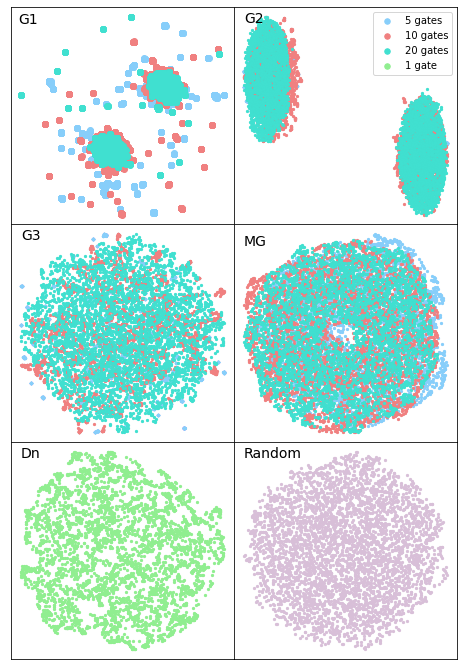

In [295]:
colors = ['lightskyblue', 'lightcoral', 'turquoise', 'thistle', 'lightgreen']
labels = ['5 gates', '10 gates', '20 gates', '1 gate']

fig, ax = plt.subplots(3,2,figsize=(8, 12))

angle = 2
rotation = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
emb_G1_2 = np.dot(embedding_G1_list[2], rotation)
idxs0 = emb_G1_2[:,1]<-0.8
idxs1 = emb_G1_2[:,1]>=-0.8
rotated_G1_2y = np.hstack([emb_G1_2[idxs0,1]+1.45, emb_G1_2[idxs1,1]+1.32])
rotated_G1_2x = np.hstack([emb_G1_2[idxs0,0]+0.2,emb_G1_2[idxs1,0]+0.15])

angle = 0.8
rotation = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
emb_G1_0 = np.dot(embedding_G1_list[0], rotation)
idxs0 = emb_G1_0[:,1]<0
idxs1 = emb_G1_0[:,1]>=0
rotated_G1_0y = np.hstack([emb_G1_0[idxs0,1]+0.5, emb_G1_0[idxs1,1]+0.6])
rotated_G1_0x = np.hstack([emb_G1_0[idxs0,0]-0.3, emb_G1_0[idxs1,0]-0.15])
rotated_G1_1x, rotated_G1_1y = embedding_G1_list[1][:,0],  embedding_G1_list[1][:,1]

ln1 = ax[0,0].scatter(rotated_G1_0x, rotated_G1_0y, color=colors[0], label = labels[0])
ln2 = ax[0,0].scatter(rotated_G1_1x, rotated_G1_1y , color=colors[1], label = labels[1])
ln3 = ax[0,0].scatter(rotated_G1_2x, rotated_G1_2y, color=colors[2], label = labels[2])
ax[0,0].text(-0.15,1.1, "G1",fontsize=14)

###########################################################################################

idxs0 = embedding_G2_list[2][:,0]<0.5
idxs1 = embedding_G2_list[2][:,0]>=0.5
rotated_G2_2y = np.hstack([embedding_G2_list[2][idxs0,1], embedding_G2_list[2][idxs1,1]])
rotated_G2_2x = np.hstack([embedding_G2_list[2][idxs0,0], embedding_G2_list[2][idxs1,0]])
idxs0 = embedding_G2_list[0][:,0]<0.5
idxs1 = embedding_G2_list[0][:,0]>=0.5
rotated_G2_0y = np.hstack([embedding_G2_list[0][idxs0,1]+0.5,embedding_G2_list[0][idxs1,1]-0.5])
rotated_G2_0x = np.hstack([embedding_G2_list[0][idxs0,0], embedding_G2_list[0][idxs1,0]])
rotated_G2_1x, rotated_G2_1y = embedding_G2_list[1][:,0],  embedding_G2_list[1][:,1]

ax[0,1].scatter(rotated_G2_0x, rotated_G2_0y, cmap="Spectral", s=5.0, color=colors[0], label = labels[0])
ax[0,1].scatter(rotated_G2_1x, rotated_G2_1y, cmap="Spectral", s=5.0, color=colors[1], label = labels[1])
ax[0,1].scatter(rotated_G2_2x, rotated_G2_2y, cmap="Spectral",s=5.0, color=colors[2], label = labels[2])
ax[0,1].text(0.0,0.97, "G2",fontsize=14)

rotated_G3_0x, rotated_G3_0y = embedding_G3_list[0][:,0],  embedding_G3_list[0][:,1]
rotated_G3_1x, rotated_G3_1y = embedding_G3_list[1][:,0],  embedding_G3_list[1][:,1]
rotated_G3_2x, rotated_G3_2y = embedding_G3_list[2][:,0],  embedding_G3_list[2][:,1]

ax[1,0].scatter(rotated_G3_0x, rotated_G3_0y, cmap="Spectral",s=5.0, color=colors[0], label = labels[0])
ax[1,0].scatter(rotated_G3_1x, rotated_G3_1y, cmap="Spectral",s=5.0, color=colors[1], label = labels[1])
ax[1,0].scatter(rotated_G3_2x, rotated_G3_2y,cmap="Spectral",s=5.0, color=colors[2], label = labels[2])
ax[1,0].text(0.0,0.97, "G3",fontsize=14)

rotated_random_x, rotated_random_y = embedding_random[:,0],  embedding_random[:,1]
ax[2,1].scatter(rotated_random_x, rotated_random_y, cmap="Spectral", s=5.0, color=colors[3])
ax[2,1].text(0.0,0.97, "Random",fontsize=14)

rotated_MG_0x, rotated_MG_0y = embedding_MG_list[0][:,0]+0.05,  embedding_MG_list[0][:,1]+0.03
rotated_MG_1x, rotated_MG_1y = embedding_MG_list[1][:,0],  embedding_MG_list[1][:,1]
rotated_MG_2x, rotated_MG_2y = embedding_MG_list[2][:,0],  embedding_MG_list[2][:,1]

ax[1,1].scatter(rotated_MG_0x, rotated_MG_0y, cmap="Spectral",s=5.0, color=colors[0], label = labels[0])
ax[1,1].scatter(rotated_MG_1x, rotated_MG_1y, cmap="Spectral",s=5.0, color=colors[1], label = labels[1])
ax[1,1].scatter(rotated_MG_2x, rotated_MG_2y,cmap="Spectral",s=5.0, color=colors[2], label = labels[2])
ax[1,1].text(0.0,0.97, "MG",fontsize=14)

rotated_Dn_x, rotated_Dn_y = embedding_Dn[:,0],  embedding_Dn[:,1]

ln4 = ax[2,0].scatter(rotated_Dn_x, rotated_Dn_y, cmap="Spectral",s=5.0, color=colors[4], label = labels[3])
ax[2,0].text(0.0,0.97, "Dn",fontsize=14)

lgnd = plt.legend([ln1, ln2, ln3, ln4], labels, bbox_to_anchor = (1,3))
for handle in lgnd.legendHandles:
    handle.set_sizes([30])
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.setp(ax, xticks=[], yticks=[])
plt.savefig('figures/pauli_space.png', format='png')
plt.show()

In [298]:
with open('results/rotated_G1_0y.npy', 'wb') as f:
            np.save(f, rotated_G1_0y)
with open('results/rotated_G1_0x.npy', 'wb') as f:
            np.save(f, rotated_G1_0x)
with open('results/rotated_G1_1y.npy', 'wb') as f:
            np.save(f, rotated_G1_1y)
with open('results/rotated_G1_1x.npy', 'wb') as f:
            np.save(f, rotated_G1_1x)
with open('results/rotated_G1_2y.npy', 'wb') as f:
            np.save(f, rotated_G1_2y)
with open('results/rotated_G1_2x.npy', 'wb') as f:
            np.save(f, rotated_G1_2x)

with open('results/rotated_G2_0y.npy', 'wb') as f:
            np.save(f, rotated_G2_0y)
with open('results/rotated_G2_0x.npy', 'wb') as f:
            np.save(f, rotated_G2_0x)
with open('results/rotated_G2_1y.npy', 'wb') as f:
            np.save(f, rotated_G2_1y)
with open('results/rotated_G2_1x.npy', 'wb') as f:
            np.save(f, rotated_G2_1x)
with open('results/rotated_G2_2y.npy', 'wb') as f:
            np.save(f, rotated_G2_2y)
with open('results/rotated_G2_2x.npy', 'wb') as f:
            np.save(f, rotated_G2_2x)
        
with open('results/rotated_G3_0y.npy', 'wb') as f:
            np.save(f, rotated_G3_0y)
with open('results/rotated_G3_0x.npy', 'wb') as f:
            np.save(f, rotated_G3_0x)
with open('results/rotated_G3_1y.npy', 'wb') as f:
            np.save(f, rotated_G3_1y)
with open('results/rotated_G3_1x.npy', 'wb') as f:
            np.save(f, rotated_G3_1x)
with open('results/rotated_G3_2y.npy', 'wb') as f:
            np.save(f, rotated_G3_2y)
with open('results/rotated_G3_2x.npy', 'wb') as f:
            np.save(f, rotated_G3_2x)
        
with open('results/rotated_random_x.npy', 'wb') as f:
            np.save(f, rotated_random_x)
with open('results/rotated_random_y.npy', 'wb') as f:
            np.save(f, rotated_random_y)

with open('results/rotated_MG_0y.npy', 'wb') as f:
            np.save(f, rotated_MG_0y)
with open('results/rotated_MG_0x.npy', 'wb') as f:
            np.save(f, rotated_MG_0x)
with open('results/rotated_MG_1y.npy', 'wb') as f:
            np.save(f, rotated_MG_1y)
with open('results/rotated_MG_1x.npy', 'wb') as f:
            np.save(f, rotated_MG_1x)
with open('results/rotated_MG_2y.npy', 'wb') as f:
            np.save(f, rotated_MG_2y)
with open('results/rotated_MG_2x.npy', 'wb') as f:
            np.save(f, rotated_MG_2x)
        
with open('results/rotated_Dn_x.npy', 'wb') as f:
            np.save(f, rotated_Dn_x)
with open('results/rotated_Dn_y.npy', 'wb') as f:
            np.save(f, rotated_Dn_y)

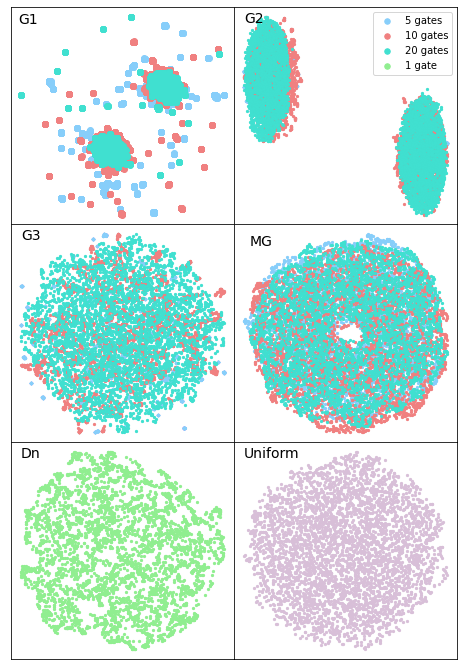

In [63]:
with open('results/rotated_G1_0y.npy', 'rb') as f:
            rotated_G1_0y = np.load(f)
with open('results/rotated_G1_0x.npy', 'rb') as f:
            rotated_G1_0x = np.load(f)
with open('results/rotated_G1_1y.npy', 'rb') as f:
            rotated_G1_1y = np.load(f)
with open('results/rotated_G1_1x.npy', 'rb') as f:
            rotated_G1_1x = np.load(f)
with open('results/rotated_G1_2y.npy', 'rb') as f:
            rotated_G1_2y = np.load(f)
with open('results/rotated_G1_2x.npy', 'rb') as f:
            rotated_G1_2x = np.load(f)

with open('results/rotated_G2_0y.npy', 'rb') as f:
            rotated_G2_0y = np.load(f)
with open('results/rotated_G2_0x.npy', 'rb') as f:
            rotated_G2_0x = np.load(f)
with open('results/rotated_G2_1y.npy', 'rb') as f:
            rotated_G2_1y = np.load(f)
with open('results/rotated_G2_1x.npy', 'rb') as f:
            rotated_G2_1x = np.load(f)
with open('results/rotated_G2_2y.npy', 'rb') as f:
            rotated_G2_2y = np.load(f)
with open('results/rotated_G2_2x.npy', 'rb') as f:
            rotated_G2_2x = np.load(f)
        
with open('results/rotated_G3_0y.npy', 'rb') as f:
            rotated_G3_0y = np.load(f)
with open('results/rotated_G3_0x.npy', 'rb') as f:
            rotated_G3_0x = np.load(f)
with open('results/rotated_G3_1y.npy', 'rb') as f:
            rotated_G3_1y = np.load(f)
with open('results/rotated_G3_1x.npy', 'rb') as f:
            rotated_G3_1x = np.load(f)
with open('results/rotated_G3_2y.npy', 'rb') as f:
            rotated_G3_2y = np.load(f)
with open('results/rotated_G3_2x.npy', 'rb') as f:
            rotated_G3_2x = np.load(f)
        
with open('results/rotated_random_x.npy', 'rb') as f:
            rotated_random_x = np.load(f)
with open('results/rotated_random_y.npy', 'rb') as f:
            rotated_random_y = np.load(f)

with open('results/rotated_MG_0y.npy', 'rb') as f:
            rotated_MG_0y = np.load(f)
with open('results/rotated_MG_0x.npy', 'rb') as f:
            rotated_MG_0x = np.load(f)
with open('results/rotated_MG_1y.npy', 'rb') as f:
            rotated_MG_1y = np.load(f)
with open('results/rotated_MG_1x.npy', 'rb') as f:
            rotated_MG_1x = np.load(f)
with open('results/rotated_MG_2y.npy', 'rb') as f:
            rotated_MG_2y = np.load(f)
with open('results/rotated_MG_2x.npy', 'rb') as f:
            rotated_MG_2x = np.load(f)
        
with open('results/rotated_Dn_x.npy', 'rb') as f:
            rotated_Dn_x = np.load(f)
with open('results/rotated_Dn_y.npy', 'rb') as f:
            rotated_Dn_y = np.load(f)


colors = ['lightskyblue', 'lightcoral', 'turquoise', 'thistle', 'lightgreen']
labels = ['5 gates', '10 gates', '20 gates', '1 gate']

fig, ax = plt.subplots(3,2,figsize=(8, 12))

ln1 = ax[0,0].scatter(rotated_G1_0x, rotated_G1_0y, color=colors[0], label = labels[0])
ln2 = ax[0,0].scatter(rotated_G1_1x, rotated_G1_1y , color=colors[1], label = labels[1])
ln3 = ax[0,0].scatter(rotated_G1_2x, rotated_G1_2y, color=colors[2], label = labels[2])
ax[0,0].text(-0.15,1.1, "G1",fontsize=14)

###########################################################################################

ax[0,1].scatter(rotated_G2_0x, rotated_G2_0y, cmap="Spectral", s=5.0, color=colors[0], label = labels[0])
ax[0,1].scatter(rotated_G2_1x, rotated_G2_1y, cmap="Spectral", s=5.0, color=colors[1], label = labels[1])
ax[0,1].scatter(rotated_G2_2x, rotated_G2_2y, cmap="Spectral",s=5.0, color=colors[2], label = labels[2])
ax[0,1].text(0.0,0.97, "G2",fontsize=14)

ax[1,0].scatter(rotated_G3_0x, rotated_G3_0y, cmap="Spectral",s=5.0, color=colors[0], label = labels[0])
ax[1,0].scatter(rotated_G3_1x, rotated_G3_1y, cmap="Spectral",s=5.0, color=colors[1], label = labels[1])
ax[1,0].scatter(rotated_G3_2x, rotated_G3_2y,cmap="Spectral",s=5.0, color=colors[2], label = labels[2])
ax[1,0].text(0.0,0.97, "G3",fontsize=14)

ax[2,1].scatter(rotated_random_x, rotated_random_y, cmap="Spectral", s=5.0, color=colors[3])
ax[2,1].text(0.0,0.97, "Uniform",fontsize=14)

ax[1,1].scatter(rotated_MG_0x-0.08, rotated_MG_0y, cmap="Spectral",s=5.0, color=colors[0], label = labels[0])
ax[1,1].scatter(rotated_MG_1x, rotated_MG_1y-0.03, cmap="Spectral",s=5.0, color=colors[1], label = labels[1])
ax[1,1].scatter(rotated_MG_2x, rotated_MG_2y,cmap="Spectral",s=5.0, color=colors[2], label = labels[2])
ax[1,1].text(0.0,0.97, "MG",fontsize=14)

ln4 = ax[2,0].scatter(rotated_Dn_x, rotated_Dn_y, cmap="Spectral",s=5.0, color=colors[4], label = labels[3])
ax[2,0].text(0.0,0.97, "Dn",fontsize=14)

lgnd = plt.legend([ln1, ln2, ln3, ln4], labels, bbox_to_anchor = (1,3))
for handle in lgnd.legendHandles:
    handle.set_sizes([30])
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.setp(ax, xticks=[], yticks=[])
plt.savefig('figures/pauli_space.png', format='png')
plt.show()

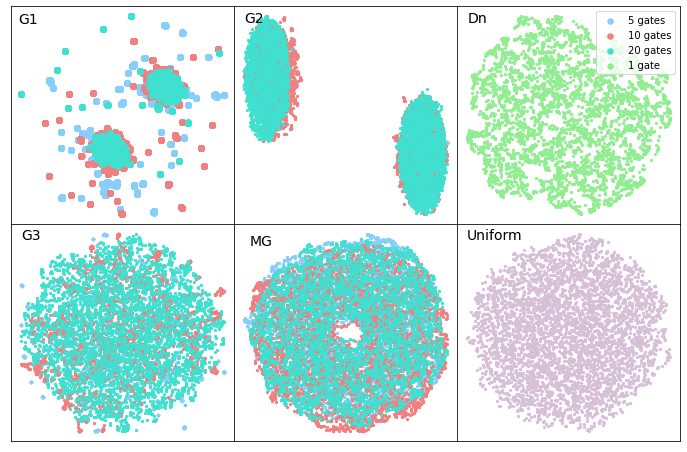

In [62]:
with open('results/rotated_G1_0y.npy', 'rb') as f:
            rotated_G1_0y = np.load(f)
with open('results/rotated_G1_0x.npy', 'rb') as f:
            rotated_G1_0x = np.load(f)
with open('results/rotated_G1_1y.npy', 'rb') as f:
            rotated_G1_1y = np.load(f)
with open('results/rotated_G1_1x.npy', 'rb') as f:
            rotated_G1_1x = np.load(f)
with open('results/rotated_G1_2y.npy', 'rb') as f:
            rotated_G1_2y = np.load(f)
with open('results/rotated_G1_2x.npy', 'rb') as f:
            rotated_G1_2x = np.load(f)

with open('results/rotated_G2_0y.npy', 'rb') as f:
            rotated_G2_0y = np.load(f)
with open('results/rotated_G2_0x.npy', 'rb') as f:
            rotated_G2_0x = np.load(f)
with open('results/rotated_G2_1y.npy', 'rb') as f:
            rotated_G2_1y = np.load(f)
with open('results/rotated_G2_1x.npy', 'rb') as f:
            rotated_G2_1x = np.load(f)
with open('results/rotated_G2_2y.npy', 'rb') as f:
            rotated_G2_2y = np.load(f)
with open('results/rotated_G2_2x.npy', 'rb') as f:
            rotated_G2_2x = np.load(f)
        
with open('results/rotated_G3_0y.npy', 'rb') as f:
            rotated_G3_0y = np.load(f)
with open('results/rotated_G3_0x.npy', 'rb') as f:
            rotated_G3_0x = np.load(f)
with open('results/rotated_G3_1y.npy', 'rb') as f:
            rotated_G3_1y = np.load(f)
with open('results/rotated_G3_1x.npy', 'rb') as f:
            rotated_G3_1x = np.load(f)
with open('results/rotated_G3_2y.npy', 'rb') as f:
            rotated_G3_2y = np.load(f)
with open('results/rotated_G3_2x.npy', 'rb') as f:
            rotated_G3_2x = np.load(f)
        
with open('results/rotated_random_x.npy', 'rb') as f:
            rotated_random_x = np.load(f)
with open('results/rotated_random_y.npy', 'rb') as f:
            rotated_random_y = np.load(f)

with open('results/rotated_MG_0y.npy', 'rb') as f:
            rotated_MG_0y = np.load(f)
with open('results/rotated_MG_0x.npy', 'rb') as f:
            rotated_MG_0x = np.load(f)
with open('results/rotated_MG_1y.npy', 'rb') as f:
            rotated_MG_1y = np.load(f)
with open('results/rotated_MG_1x.npy', 'rb') as f:
            rotated_MG_1x = np.load(f)
with open('results/rotated_MG_2y.npy', 'rb') as f:
            rotated_MG_2y = np.load(f)
with open('results/rotated_MG_2x.npy', 'rb') as f:
            rotated_MG_2x = np.load(f)
        
with open('results/rotated_Dn_x.npy', 'rb') as f:
            rotated_Dn_x = np.load(f)
with open('results/rotated_Dn_y.npy', 'rb') as f:
            rotated_Dn_y = np.load(f)


colors = ['lightskyblue', 'lightcoral', 'turquoise', 'thistle', 'lightgreen']
labels = ['5 gates', '10 gates', '20 gates', '1 gate']

fig, ax = plt.subplots(2,3,figsize=(12,8))

ln1 = ax[0,0].scatter(rotated_G1_0x, rotated_G1_0y, color=colors[0], label = labels[0])
ln2 = ax[0,0].scatter(rotated_G1_1x, rotated_G1_1y , color=colors[1], label = labels[1])
ln3 = ax[0,0].scatter(rotated_G1_2x, rotated_G1_2y, color=colors[2], label = labels[2])
ax[0,0].text(-0.15,1.1, "G1",fontsize=14)

###########################################################################################

ax[0,1].scatter(rotated_G2_0x, rotated_G2_0y, cmap="Spectral", s=5.0, color=colors[0], label = labels[0])
ax[0,1].scatter(rotated_G2_1x, rotated_G2_1y, cmap="Spectral", s=5.0, color=colors[1], label = labels[1])
ax[0,1].scatter(rotated_G2_2x, rotated_G2_2y, cmap="Spectral",s=5.0, color=colors[2], label = labels[2])
ax[0,1].text(0.0,0.97, "G2",fontsize=14)

ax[1,0].scatter(rotated_G3_0x, rotated_G3_0y, cmap="Spectral",s=5.0, color=colors[0], label = labels[0])
ax[1,0].scatter(rotated_G3_1x, rotated_G3_1y, cmap="Spectral",s=5.0, color=colors[1], label = labels[1])
ax[1,0].scatter(rotated_G3_2x, rotated_G3_2y,cmap="Spectral",s=5.0, color=colors[2], label = labels[2])
ax[1,0].text(0.0,0.97, "G3",fontsize=14)

ax[1,2].scatter(rotated_random_x, rotated_random_y, cmap="Spectral", s=5.0, color=colors[3])
ax[1,2].text(0.0,0.97, "Uniform",fontsize=14)

ax[1,1].scatter(rotated_MG_0x-0.08, rotated_MG_0y, cmap="Spectral",s=5.0, color=colors[0], label = labels[0])
ax[1,1].scatter(rotated_MG_1x, rotated_MG_1y-0.03, cmap="Spectral",s=5.0, color=colors[1], label = labels[1])
ax[1,1].scatter(rotated_MG_2x, rotated_MG_2y,cmap="Spectral",s=5.0, color=colors[2], label = labels[2])
ax[1,1].text(0.0,0.97, "MG",fontsize=14)

ln4 = ax[0,2].scatter(rotated_Dn_x, rotated_Dn_y, cmap="Spectral",s=5.0, color=colors[4], label = labels[3])
ax[0,2].text(0.0,0.97, "Dn",fontsize=14)

lgnd = plt.legend([ln1, ln2, ln3, ln4], labels, bbox_to_anchor = (1,2))
for handle in lgnd.legendHandles:
    handle.set_sizes([30])
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.setp(ax, xticks=[], yticks=[])
plt.savefig('figures/pauli_space2.png', format='png')
plt.show()

## 4. Animation

Here we display the same results with an animation, for better understanding.

In [72]:
from IPython.display import HTML, display
from matplotlib.animation import FuncAnimation

plt.ioff()

colors = ['lightskyblue', 'lightcoral', 'turquoise', 'thistle', 'lightgreen']
labels = ['5 gates', '10 gates', '20 gates', '1 gate']

# Data lists
emb_G1x = [rotated_G1_0x, rotated_G1_1x, rotated_G1_2x]
emb_G1y = [rotated_G1_0y, rotated_G1_1y, rotated_G1_2y]

emb_G2x = [rotated_G2_0x, rotated_G2_1x, rotated_G2_2x]
emb_G2y = [rotated_G2_0y, rotated_G2_1y, rotated_G2_2y]

emb_G3x = [rotated_G3_0x, rotated_G3_1x, rotated_G3_2x]
emb_G3y = [rotated_G3_0y, rotated_G3_1y, rotated_G3_2y]

emb_MGx = [rotated_MG_0x-0.08,rotated_MG_1x,rotated_MG_2x]
emb_MGy = [rotated_MG_0y,rotated_MG_1y-0.03,rotated_MG_2y]

fig, ax = plt.subplots(2,3,figsize=(12,8))

# Scatters
ln1, = ax[0,0].plot(emb_G1x[0], emb_G1y[0], 'o', markersize=2, color = colors[0])
ln1b, = ax[0,0].plot([], [], 'o', markersize=2, color = colors[1])
ln1c, = ax[0,0].plot([], [], 'o', markersize=2, color = colors[2])
ln1s = [ln1, ln1b, ln1c]
ln=ln1
ln2, = ax[0,1].plot(emb_G1x[0], emb_G1y[0], 'o', markersize=2, color = colors[0])
ln2b, = ax[0,1].plot([], [], 'o', markersize=2, color = colors[1])
ln2c, = ax[0,1].plot([], [], 'o', markersize=2, color = colors[2])
ln2s = [ln2, ln2b, ln2c]

ln3, = ax[1,0].plot(emb_G3x[0], emb_G3y[0], 'o', markersize=2, color = colors[0])
ln3b, = ax[1,0].plot([], [], 'o', markersize=2, color = colors[1])
ln3c, = ax[1,0].plot([], [], 'o', markersize=2, color = colors[2])
ln3s = [ln3, ln3b, ln3c]

ln4, = ax[1,1].plot(emb_MGx[0], emb_MGy[0], 'o', markersize=2, color = colors[0])
ln4b, = ax[1,1].plot([], [], 'o', markersize=2, color = colors[1])
ln4c, = ax[1,1].plot([], [], 'o', markersize=2, color = colors[2])
ln4s = [ln4, ln4b, ln4c]

ln5, = ax[0,2].plot(rotated_Dn_x, rotated_Dn_y, 'o', markersize=2, color = colors[4])
ln5b, = ax[0,2].plot([], [], 'o', color = colors[1])
ln5c, = ax[0,2].plot([], [], 'o', color = colors[2])
ln5s = [ln5, ln5b, ln5c]


ln6, = ax[1,2].plot(rotated_random_x, rotated_random_y, 'o', markersize=2, color = colors[3])
title = ax[0,0].set_title("", fontname = 'Lucida Sans Unicode', fontsize=16, y=1.05, x = 1.5)
plt.subplots_adjust(wspace=0, hspace=0)
plt.setp(ax, xticks=[], yticks=[])


def init():
    ax[0,0].text(0,1.05, "G1",fontsize=14)
    ax[0,1].text(0.0,1.05, "G2",fontsize=14)
    ax[1,0].text(0.0,0.97, "G3",fontsize=14)
    ax[1,1].text(-0.05,1.03, "MG",fontsize=14)
    ax[0,2].text(0.0,0.97, "Dn",fontsize=14)
    ax[1,2].text(0.0,0.97, "Random",fontsize=14)
    return ln,

def update(i):
    # G1
    ln1s[i].set_data(emb_G1x[i], emb_G1y[i])
    # G2
    ln2s[i].set_data(emb_G2x[i], emb_G2y[i])
    # G3
    ln3s[i].set_data(emb_G3x[i], emb_G3y[i])
    # MG
    ln4s[i].set_data(emb_MGx[i], emb_MGy[i])
    title.set_text(labels[i])

    return ln,ln1,ln2,ln3,ln4,ln5,ln6,title

ani = FuncAnimation(fig, update, interval=2000, frames=3, init_func=init, blit=True)
display(HTML(ani.to_html5_video()))
plt.close(fig)


In [71]:
from IPython.display import HTML, display
from matplotlib.animation import FuncAnimation

plt.ioff()

colors = ['lightskyblue', 'lightcoral', 'turquoise', 'thistle', 'lightgreen']
labels = ['5 gates', '10 gates', '20 gates', '1 gate']

# Data lists
emb_G1x = [rotated_G1_0x, rotated_G1_1x, rotated_G1_2x]
emb_G1y = [rotated_G1_0y, rotated_G1_1y, rotated_G1_2y]

emb_G2x = [rotated_G2_0x, rotated_G2_1x, rotated_G2_2x]
emb_G2y = [rotated_G2_0y, rotated_G2_1y, rotated_G2_2y]

emb_G3x = [rotated_G3_0x, rotated_G3_1x, rotated_G3_2x]
emb_G3y = [rotated_G3_0y, rotated_G3_1y, rotated_G3_2y]

emb_MGx = [rotated_MG_0x-0.08,rotated_MG_1x,rotated_MG_2x]
emb_MGy = [rotated_MG_0y+0.05,rotated_MG_1y+0.05,rotated_MG_2y+0.05]

fig, ax = plt.subplots(2,3,figsize=(12,8))

# Scatters
ln1, = ax[0,0].plot(emb_G1x[0], emb_G1y[0], 'o', markersize=2, color = colors[0])

ln=ln1
ln2, = ax[0,1].plot(emb_G1x[0], emb_G1y[0], 'o', markersize=2, color = colors[0])

ln3, = ax[1,0].plot(emb_G3x[0], emb_G3y[0], 'o', markersize=2, color = colors[0])

ln4, = ax[1,1].plot(emb_MGx[0], emb_MGy[0], 'o', markersize=2, color = colors[0])

ln5, = ax[0,2].plot(rotated_Dn_x, rotated_Dn_y, 'o', markersize=2, color = colors[4])

ln6, = ax[1,2].plot(rotated_random_x, rotated_random_y, 'o', markersize=2, color = colors[3])

title = ax[0,0].set_title("", fontname = 'Lucida Sans Unicode', fontsize=16, y=1.05, x = 1.5)
plt.subplots_adjust(wspace=0, hspace=0)
plt.setp(ax, xticks=[], yticks=[])


def init():
    ax[0,0].text(0,1.05, "G1",fontsize=14)
    ax[0,1].text(0.0,1.05, "G2",fontsize=14)
    ax[1,0].text(0.0,0.97, "G3",fontsize=14)
    ax[1,1].text(-0.05,1.03, "MG",fontsize=14)
    ax[0,2].text(0.0,0.97, "Dn",fontsize=14)
    ax[1,2].text(0.0,0.97, "Random",fontsize=14)
    return ln,

def update(i):
    # G1
    ln1.set_data(emb_G1x[i], emb_G1y[i])
    ln1.set_color(colors[i])
    # G2
    ln2.set_data(emb_G2x[i], emb_G2y[i])
    ln2.set_color(colors[i])
    # G3
    ln3.set_data(emb_G3x[i], emb_G3y[i])
    ln3.set_color(colors[i])
    # MG
    ln4.set_data(emb_MGx[i], emb_MGy[i])
    ln4.set_color(colors[i])
    title.set_text(labels[i])

    return ln,ln1,ln2,ln3,ln4,ln5,ln6,title

ani = FuncAnimation(fig, update, interval=2000, frames=3, init_func=init, blit=True)
display(HTML(ani.to_html5_video()))
plt.close(fig)


## Supplemental material

## Second excited state

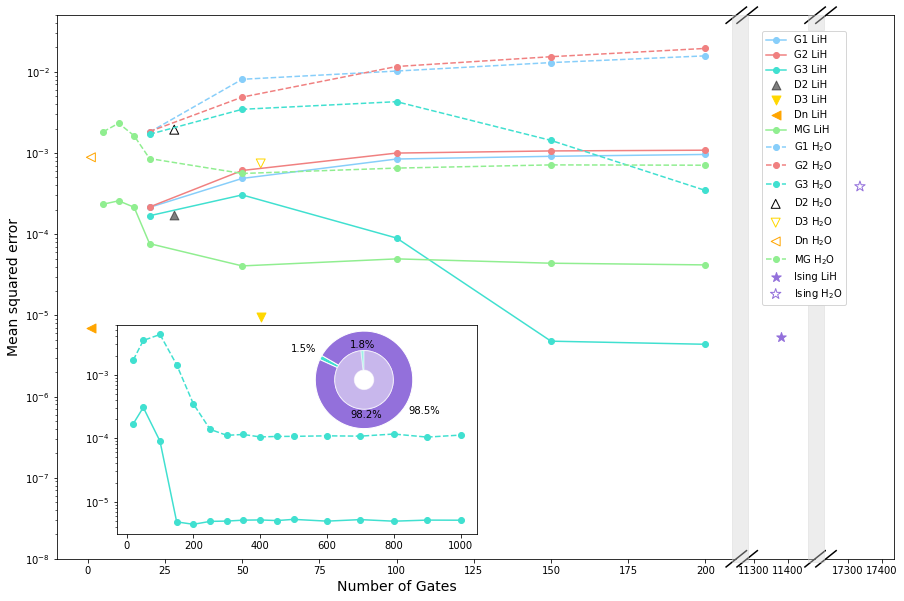

In [122]:
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid.inset_locator import inset_axes

names_type = [u'G1', u'G2' ,u'G3', u'MG']
x = [20,50,100,150,200]
xMG = [5,10,15,20,50,100,150,200]
colors = ['lightskyblue', 'lightcoral', 'turquoise', 'black', 'gold', 'orange', 'lightgreen', 'mediumpurple']

#LIH
mses_G1 = results['MSE2'][['G1 '+ str(n) for n in x]]
mses_G2 = results['MSE2'][['G2 '+ str(n) for n in x]]
mses_G3 = results['MSE2'][['G3 '+ str(n) for n in x]]
mses_MG = results['MSE2'][['MG '+ str(n) for n in xMG]]
mses_D2 = results['MSE2']['D2']
mses_D3 = results['MSE2']['D3']
mses_Dn = results['MSE2']['Dn']
mses_Ising = results['MSE2']['Ising']

#H2O
mses_G1_H2O = results_H2O['MSE2'][['G1 '+ str(n) for n in x]]
mses_G2_H2O = results_H2O['MSE2'][['G2 '+ str(n) for n in x]]
mses_G3_H2O = results_H2O['MSE2'][['G3 '+ str(n) for n in x]]
mses_MG_H2O = results_H2O['MSE2'][['MG '+ str(n) for n in xMG]]
mses_D2_H2O = results_H2O['MSE2']['D2']
mses_D3_H2O = results_H2O['MSE2']['D3']
mses_Dn_H2O = results_H2O['MSE2']['Dn']
mses_Ising_H2O = results_H2O['MSE2']['Ising']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize = (15,10), gridspec_kw={'width_ratios': [100, 10, 10]}, sharey=True)

ax1.plot(x, mses_G1, marker='o', color = colors[0], label ='G1 LiH')
ax1.plot(x, mses_G2, marker='o', color = colors[1], label ='G2 LiH')
ax1.plot(x, mses_G3, marker='o', color = colors[2], label ='G3 LiH')
ax1.scatter(28, mses_D2, marker='^', s=80,alpha=0.5, color = colors[3], label ='D2 LiH')
ax1.scatter(56, mses_D3, marker='v', s=80, color = colors[4], label ='D3 LiH')
ax1.scatter(1, mses_Dn, marker='<', s=80, color = colors[5], label ='Dn LiH')
ax1.plot(xMG, mses_MG, marker='o', color = colors[6], label ='MG LiH')

ax1.plot(x, mses_G1_H2O, linestyle='--', marker='o', color = colors[0], label ='G1 $\mathrm{H_2O}$')
ax1.plot(x, mses_G2_H2O, linestyle='--', marker='o', color = colors[1], label ='G2 $\mathrm{H_2O}$')
ax1.plot(x, mses_G3_H2O, linestyle='--', marker='o', color = colors[2], label ='G3 $\mathrm{H_2O}$')
ax1.scatter(28, mses_D2_H2O, facecolors='none', s=80, marker='^',  color = colors[3], label ='D2 $\mathrm{H_2O}$')
ax1.scatter(56, mses_D3_H2O, facecolors='none', s=80, marker='v', color = colors[4], label ='D3 $\mathrm{H_2O}$')
ax1.scatter(1, mses_Dn_H2O, facecolors='none', s=80, marker='<', color = colors[5], label ='Dn $\mathrm{H_2O}$')
ax1.plot(xMG, mses_MG_H2O, linestyle='--', marker='o', color = colors[6], label ='MG $\mathrm{H_2O}$')

# Ising
ax1.scatter(11381, mses_Ising, marker='*', s=100, color = colors[7], label ='Ising LiH')
ax2.scatter(11381, mses_Ising, marker='*', s=100, color = colors[7], label ='Ising LiH')
ax1.scatter(17335, mses_Ising_H2O,facecolors='none', marker='*', s=120, color = colors[7], label ='Ising $\mathrm{H_2O}$')
ax3.scatter(17335, mses_Ising_H2O,facecolors='none', marker='*', s=120, color = colors[7], label ='Ising $\mathrm{H_2O}$')



# Insert
axins = inset_axes(ax1,
                   width=5,  # width = 30% of parent_bbox
                   height=2.9,  # height : 1 inch
                   loc=3,
                   bbox_to_anchor=(190,110))
# LiH
x2 = [20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000]
mses_G3_long = results_G3['MSE2'][['G3 '+ str(n) for n in x2]]
axins.plot(x2, mses_G3_long, marker='o', color = colors[2] )

# H2O
mses_G3_long_H2O = results_G3_H2O['MSE2'][['G3 '+ str(n) for n in x2]]
axins.plot(x2, mses_G3_long_H2O, linestyle='--', marker='o', color = colors[2] )
axins.set_yscale('log')

# Insert inside Insert 
axins2 = inset_axes(axins,
                   width=2.7,  # width = 30% of parent_bbox
                   height=1.5,  # height : 1 inch
                   loc=3,
                   bbox_to_anchor=(340,210))
axins2.set_frame_on(False)
sizes = [1.5, 98.5]
explode = [0.0,0]
size = 0.2
rad = 0.5
axins2.pie(sizes, explode=explode, radius = rad, startangle=150, colors =[colors[2], colors[7]],
          autopct='%1.1f%%',pctdistance=1.4, wedgeprops=dict(width=size, edgecolor='w'))


sizes = [1.8, 98.2]
pie2 = axins2.pie(sizes, explode=explode, radius = rad - size, startangle=90, colors =[colors[2], colors[7]],
           autopct='%1.1f%%',pctdistance=1.2, wedgeprops=dict(width=size, edgecolor='w'))
pie2[0][0].set_alpha(0.5)
pie2[0][1].set_alpha(0.5)
axins2.axis("equal") 

ax1.set_yscale('log')
ax1.set_ylim(1e-8, 5e-2)
ax1.set_xlabel('Number of Gates',fontsize=14)
ax1.set_ylabel('Mean squared error',fontsize=14)
ax1.set_xlim(-10,210)
ax2.set_xlim(11281,11481)
ax3.set_xlim(17235,17435)


ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax2.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False)
ax3.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False)
d = .015
dist = 0.4
ax1.plot((1 - d, 1 + d), (-d, +d), **dict(transform=ax1.transAxes, color='k', clip_on=False))
ax2.plot((- 10*d, +10*d), (-d, +d), **dict(transform=ax2.transAxes, color='k', clip_on=False))

ax1.plot((1-d, 1+d), (1-d, 1+d), **dict(transform=ax1.transAxes, color='k', clip_on=False))
ax2.plot((-10*d, 10*d), (1-d, 1+d), **dict(transform=ax2.transAxes, color='k', clip_on=False))

ax2.plot((1 - 10*d, 1 + 10*d), (-d, +d), **dict(transform=ax2.transAxes, color='k', clip_on=False))
ax3.plot((- 10*d, +10*d), (-d, +d), **dict(transform=ax3.transAxes, color='k', clip_on=False))

ax2.plot((1-10*d, 1+10*d), (1-d, 1+d), **dict(transform=ax2.transAxes, color='k', clip_on=False))
ax3.plot((-10*d, 10*d), (1-d, 1+d), **dict(transform=ax3.transAxes, color='k', clip_on=False))
 
ax1.legend(bbox_to_anchor=(1.03, 0.98))
ax2.set_zorder(-1)
ax3.set_zorder(-1)
axins.set_zorder(1)
axins2.set_zorder(1)
#fig.set_facecolor('lightgray')
plt.subplots_adjust(wspace=0.04, hspace=0)


tri1 = Rectangle((0.75, 0.12), 0.015, 0.76, color='lightgray', alpha=0.4, 
                transform=fig.transFigure, figure=fig)
tri2 = Rectangle((0.82, 0.12), 0.015, 0.358, color='lightgray', alpha=0.4,
                transform=fig.transFigure, figure=fig)
tri3 = Rectangle((0.82, 0.86), 0.015, 0.02, color='lightgray', alpha=0.4,
                transform=fig.transFigure, figure=fig)
fig.patches.extend([tri1, tri2, tri3])

plt.savefig('figures/msesE2.png', format='png')
plt.show()

## Number of gates for the Ising model

In [4]:
with open('../results/LiH/Ising_sizes/sizes.npy', 'rb') as f:
            sizes1 = np.load(f)
        
with open('../results/H2O/Ising_sizes/sizes.npy', 'rb') as f:
            sizes2 = np.load(f)

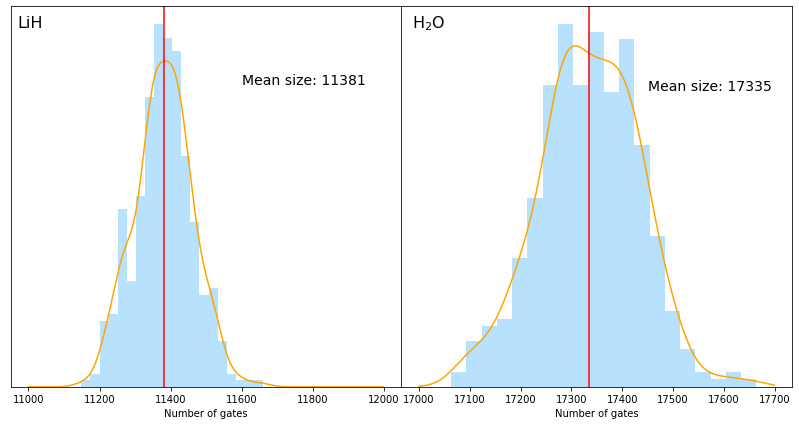

In [6]:
from scipy import stats

fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (14,7))

x = np.arange(11000,12000,1)
ax1.hist(sizes1, density=True, alpha=0.6, bins=20, color='lightskyblue')
kde = stats.gaussian_kde(sizes1)
ax1.plot(x, kde(x), color='orange')
ax1.axvline(x=np.mean(sizes1), color='red')
ax1.text(11600, 0.0045, 'Mean size: '+ str(int(np.mean(sizes1))), fontsize=14)
ax1.set_xlabel('Number of gates')
ax1.set_title('LiH', y=0.93, x=0.05, fontsize=16)

x = np.arange(17000,17700,1)
ax2.hist(sizes2, density=True, alpha=0.6, bins=20, color='lightskyblue')
kde = stats.gaussian_kde(sizes2)
ax2.plot(x, kde(x), color='orange')
ax2.axvline(x=np.mean(sizes2), color='red')
ax2.text(17450, 0.00327, 'Mean size: '+ str(int(np.mean(sizes2))), fontsize=14)
ax2.set_xlabel('Number of gates')
ax2.set_title('$\mathrm{H_2O}$', y=0.93, x=0.07, fontsize=16)

plt.subplots_adjust(wspace=0, hspace=0)
plt.setp(ax1,  yticks=[])
plt.setp(ax2,  yticks=[])
plt.savefig('../figures/Ising.png', format='png')
plt.show()